In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ast
import csv
import time
import matplotlib.ticker as mtick

# 원하시는 한글 폰트 이름을 지정하세요. (예: 'Malgun Gothic', 'AppleGothic')
plt.rc('font', family='Malgun Gothic') # Windows 환경
# 폰트 설정 후에는 음수 부호가 깨지는 것을 방지하기 위해 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

# 서비스 내부 데이터.csv 파일 불러오기

## accounts_attendance

In [2]:
# csv 파일 불러오기
accounts_attendance_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_attendance.csv'
attendance_column_names = ['id', 'attendance_date_list', 'user_id']
accounts_attendance_df = pd.read_csv(accounts_attendance_path,engine='python',escapechar='\\',quoting=csv.QUOTE_MINIMAL,header=None,names=attendance_column_names)

In [3]:
accounts_attendance_df.head()

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453


In [4]:
# 'attendance_date_list' 컬럼의 문자열을 실제 파이썬 리스트 객체로 변환
if 'attendance_date_list' in accounts_attendance_df.columns:
    accounts_attendance_df['attendance_date_list'] = accounts_attendance_df['attendance_date_list'].apply(
        lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x, str) and x.strip() != '' else []
    )
    print("\n'attendance_date_list' 컬럼이 리스트 객체로 변환되었습니다.")

    # 변환 후, 실제로 리스트 타입이 되었는지 다시 확인
    if not accounts_attendance_df['attendance_date_list'].empty:
        third_element_type = type(accounts_attendance_df['attendance_date_list'].iloc[0])
        print(f"변환 후 컬럼 첫 번째 요소의 실제 타입: {third_element_type}")

        # 모든 요소가 리스트 타입인지 최종 확인 (데이터 양에 따라 시간 소요)
        all_are_lists = accounts_attendance_df['attendance_date_list'].apply(lambda x: isinstance(x, list)).all()
        print(f"변환 후 컬럼의 모든 요소가 리스트 타입인가요? {all_are_lists}")

    # 리스트 안에 정수가 들어있는지 확인 (선택 사항)
    if all_are_lists and len(accounts_attendance_df['attendance_date_list'].iloc[0]) > 0:
        first_list_item_type = type(accounts_attendance_df['attendance_date_list'].iloc[0][0])
        print(f"리스트 내부 첫 번째 요소의 타입: {first_list_item_type}")

else:
    print("\n'attendance_date_list' 컬럼을 찾을 수 없습니다. 컬럼명을 확인해 주세요.")


'attendance_date_list' 컬럼이 리스트 객체로 변환되었습니다.
변환 후 컬럼 첫 번째 요소의 실제 타입: <class 'list'>
변환 후 컬럼의 모든 요소가 리스트 타입인가요? True
리스트 내부 첫 번째 요소의 타입: <class 'str'>


In [5]:
# 'attendance_date_list' 컬럼을 explode하여 각 리스트 요소를 개별 행으로 분리
# explode()는 리스트 요소를 새 행으로 펼치고, 다른 컬럼의 값은 복제
explode_accounts_attendance_df = accounts_attendance_df.explode('attendance_date_list').reset_index(drop=True)
explode_accounts_attendance_df.head(10)

,id,attendance_date_list,user_id
0,1,2023-05-27,1446852
1,1,2023-05-28,1446852
2,1,2023-05-29,1446852
3,1,2023-05-30,1446852
4,1,2023-06-03,1446852
5,1,2023-06-06,1446852
6,1,2023-06-12,1446852
7,1,2023-06-15,1446852
8,1,2023-07-10,1446852
9,1,2023-07-31,1446852


In [6]:
explode_accounts_attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243272 entries, 0 to 2243271
Data columns (total 3 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id                    int64 
 1   attendance_date_list  object
 2   user_id               int64 
dtypes: int64(2), object(1)
memory usage: 51.3+ MB


In [7]:
explode_accounts_attendance_df.shape

(2243272, 3)

In [8]:
# id 컬럼 지우기
explode_accounts_attendance_df.drop('id', axis=1, inplace=True)
explode_accounts_attendance_df.head()

,attendance_date_list,user_id
0,2023-05-27,1446852
1,2023-05-28,1446852
2,2023-05-29,1446852
3,2023-05-30,1446852
4,2023-06-03,1446852


In [9]:
# 결측치 확인
# 결측치 X
explode_accounts_attendance_df.isnull().sum()

attendance_date_list    20945
user_id                     0
dtype: int64

In [10]:
# 데이터 중복 확인 -> 없음
explode_accounts_attendance_df[explode_accounts_attendance_df.duplicated()]

,attendance_date_list,user_id


In [11]:
# attendance_date_list 컬럼의 dtype을 datetime으로 변환
explode_accounts_attendance_df['attendance_date_list'] = pd.to_datetime(explode_accounts_attendance_df['attendance_date_list'], errors='coerce')
explode_accounts_attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243272 entries, 0 to 2243271
Data columns (total 2 columns):
 #   Column                Dtype         
---  ------                -----         
 0   attendance_date_list  datetime64[ns]
 1   user_id               int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 34.2 MB


## accounts_blockrecord

In [12]:
# csv 파일 불러오기
accounts_blockrecord_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_blockrecord.csv'
blockrecord_column_names = ['id', 'reason', 'created_at', 'block_user_id', 'user_id']
accounts_blockrecord_df = pd.read_csv(accounts_blockrecord_path, header=None, names=blockrecord_column_names)

In [13]:
accounts_blockrecord_df.head()

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177


In [14]:
accounts_blockrecord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             19482 non-null  int64 
 1   reason         19482 non-null  object
 2   created_at     19482 non-null  object
 3   block_user_id  19482 non-null  int64 
 4   user_id        19482 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 761.1+ KB


In [15]:
# 결측치 확인
# 결측치 없음
accounts_blockrecord_df.isnull().sum()

id               0
reason           0
created_at       0
block_user_id    0
user_id          0
dtype: int64

In [16]:
# 데이터 중복 확인 -> 5개
accounts_blockrecord_df[accounts_blockrecord_df.duplicated()]

# 중복된 데이터 제거
accounts_blockrecord_df = accounts_blockrecord_df.drop_duplicates()
accounts_blockrecord_df.shape

(19482, 5)

In [17]:
# created_at 컬럼의 dtype을 datetime으로 변환
accounts_blockrecord_df['created_at'] = pd.to_datetime(accounts_blockrecord_df['created_at'], errors='coerce')
accounts_blockrecord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19482 non-null  int64         
 1   reason         19482 non-null  object        
 2   created_at     19482 non-null  datetime64[ns]
 3   block_user_id  19482 non-null  int64         
 4   user_id        19482 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 761.1+ KB


In [18]:
accounts_blockrecord_df.head()

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177


## accounts_failpaymenthistory

In [19]:
# csv 파일 불러오기
accounts_failpaymenthistory_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_failpaymenthistory.csv'
failpaymenthistory_column_names = ['id', 'productId', 'phone_type', 'created_at', 'user_id']
accounts_failpaymenthistory_df = pd.read_csv(accounts_failpaymenthistory_path, header=None, names=failpaymenthistory_column_names)

In [20]:
accounts_failpaymenthistory_df.head()

,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730


In [21]:
accounts_failpaymenthistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          163 non-null    int64 
 1   productId   163 non-null    object
 2   phone_type  163 non-null    object
 3   created_at  163 non-null    object
 4   user_id     163 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 6.5+ KB


In [22]:
# 결측치 확인
# 결측치 없음
accounts_failpaymenthistory_df.isnull().sum()

id            0
productId     0
phone_type    0
created_at    0
user_id       0
dtype: int64

In [23]:
# 데이터 중복 확인 -> 1개
accounts_failpaymenthistory_df[accounts_failpaymenthistory_df.duplicated()]

# 중복된 데이터 제거
accounts_failpaymenthistory_df = accounts_failpaymenthistory_df.drop_duplicates()
accounts_failpaymenthistory_df.shape

(163, 5)

In [24]:
# created_at 컬럼의 dtype을 datetime으로 변환
accounts_failpaymenthistory_df['created_at'] = pd.to_datetime(accounts_failpaymenthistory_df['created_at'], errors='coerce')
accounts_failpaymenthistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          163 non-null    int64         
 1   productId   163 non-null    object        
 2   phone_type  163 non-null    object        
 3   created_at  163 non-null    datetime64[ns]
 4   user_id     163 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.5+ KB


In [25]:
accounts_failpaymenthistory_df.head()

,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730


## accounts_friendrequest

In [26]:
# csv 파일 불러오기
accounts_friendrequest_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_friendrequest.csv'
accounts_friendrequeset_df = pd.read_csv(accounts_friendrequest_path)

In [27]:
accounts_friendrequeset_df.head()

,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521


In [28]:
accounts_friendrequeset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147175 entries, 0 to 17147174
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               int64 
 1   status           object
 2   created_at       object
 3   updated_at       object
 4   receive_user_id  int64 
 5   send_user_id     int64 
dtypes: int64(3), object(3)
memory usage: 784.9+ MB


In [29]:
# 결측치 확인
# 결측치 없음
accounts_friendrequeset_df.isnull().sum()

id                 0
status             0
created_at         0
updated_at         0
receive_user_id    0
send_user_id       0
dtype: int64

In [30]:
# 데이터 중복 확인 -> 63개 발견
accounts_friendrequeset_df[accounts_friendrequeset_df.duplicated()]

# 중복된 데이터 제거
accounts_friendrequeset_df = accounts_friendrequeset_df.drop_duplicates()
accounts_friendrequeset_df.shape

(17147175, 6)

In [31]:
# created_at, updated_at 컬럼의 dtype을 datetime으로 변환
accounts_friendrequeset_df['created_at'] = pd.to_datetime(accounts_friendrequeset_df['created_at'], errors='coerce')
accounts_friendrequeset_df['updated_at'] = pd.to_datetime(accounts_friendrequeset_df['updated_at'], errors='coerce')
accounts_friendrequeset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147175 entries, 0 to 17147174
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   status           object        
 2   created_at       datetime64[ns]
 3   updated_at       datetime64[ns]
 4   receive_user_id  int64         
 5   send_user_id     int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 784.9+ MB


In [32]:
accounts_friendrequeset_df.head()

,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521


## accounts_group

In [33]:
# csv 파일 불러오기
accounts_group_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_group.csv'
group_column_names = ['id', 'grade', 'class_num', 'school_id']
accounts_group_df = pd.read_csv(accounts_group_path,engine='python',escapechar='\\',quoting=csv.QUOTE_MINIMAL,header=None,names=group_column_names)

In [34]:
accounts_group_df.head()

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


In [35]:
accounts_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84515 entries, 0 to 84514
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         84515 non-null  int64
 1   grade      84515 non-null  int64
 2   class_num  84515 non-null  int64
 3   school_id  84515 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


In [36]:
# 결측치 확인
# 결측치 없음
accounts_group_df.isnull().sum()

id           0
grade        0
class_num    0
school_id    0
dtype: int64

In [37]:
# 데이터 중복 확인 -> 5개
accounts_group_df[accounts_group_df.duplicated()]

# 중복된 데이터 제거
accounts_group_df = accounts_group_df.drop_duplicates()
accounts_group_df.shape

(84515, 4)

In [38]:
accounts_group_df.head()

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


## accounts_nearbyschool

In [39]:
# csv 파일 불러오기
accounts_nearbyschool_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_nearbyschool.csv'
nearbyschool_column_names = ['id', 'distance', 'nearby_school_id', 'school_id']
accounts_nearbyschool_df = pd.read_csv(accounts_nearbyschool_path,engine='python',escapechar='\\',quoting=csv.QUOTE_MINIMAL,header=None,names=nearbyschool_column_names)

In [40]:
accounts_nearbyschool_df.head()

,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7


In [41]:
accounts_nearbyschool_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59500 non-null  int64  
 1   distance          59500 non-null  float64
 2   nearby_school_id  59500 non-null  int64  
 3   school_id         59500 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.8 MB


In [42]:
# 결측치 확인
# 결측치 없음
accounts_nearbyschool_df.isnull().sum()

id                  0
distance            0
nearby_school_id    0
school_id           0
dtype: int64

In [43]:
# 데이터 중복 확인
# 중복 없음
accounts_nearbyschool_df[accounts_nearbyschool_df.duplicated()]

,id,distance,nearby_school_id,school_id


In [44]:
accounts_nearbyschool_df.head()

,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7


## accounts_paymenthistory

In [45]:
# csv 파일 불러오기
accounts_paymenthistory_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_paymenthistory.csv'
paymenthistory_column_names = ['id', 'productID', 'phone_type', 'created_at', 'user_id']
accounts_paymenthistory_df = pd.read_csv(accounts_paymenthistory_path, header=None, names=paymenthistory_column_names)

In [46]:
accounts_paymenthistory_df.head()

,id,productID,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081


In [47]:
accounts_paymenthistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95140 non-null  int64 
 1   productID   95140 non-null  object
 2   phone_type  95140 non-null  object
 3   created_at  95140 non-null  object
 4   user_id     95140 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [48]:
# 결측치 확인
# 결측치 없음
accounts_paymenthistory_df.isnull().sum()

id            0
productID     0
phone_type    0
created_at    0
user_id       0
dtype: int64

In [49]:
# 데이터 중복 확인 -> 521개 발견
accounts_paymenthistory_df[accounts_paymenthistory_df.duplicated()]

# 중복된 데이터 제거
accounts_paymenthistory_df = accounts_paymenthistory_df.drop_duplicates()
accounts_paymenthistory_df.shape

(95140, 5)

In [50]:
# created_at 컬럼의 dtype을 datetime으로 변환
accounts_paymenthistory_df['created_at'] = pd.to_datetime(accounts_paymenthistory_df['created_at'], errors='coerce')
accounts_paymenthistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          95140 non-null  int64         
 1   productID   95140 non-null  object        
 2   phone_type  95140 non-null  object        
 3   created_at  95140 non-null  datetime64[ns]
 4   user_id     95140 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.6+ MB


In [51]:
accounts_paymenthistory_df.head()

,id,productID,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081


## accounts_user_contacts

In [52]:
# csv 파일 불러오기
accounts_user_contacts_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_user_contacts.csv'
user_contacts_column_names = ['id', 'contacts_count', 'invite_user_id_list', 'user_id']
accounts_user_contacts_df = pd.read_csv(accounts_user_contacts_path, engine='python',escapechar='\\', header=None,quoting=csv.QUOTE_MINIMAL, names=user_contacts_column_names)

In [53]:
accounts_user_contacts_df.head()

,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476


In [54]:
# 'invite_user_id_list' 컬럼의 문자열을 실제 파이썬 리스트 객체로 변환
if 'invite_user_id_list' in accounts_user_contacts_df.columns:
    accounts_user_contacts_df['invite_user_id_list'] = accounts_user_contacts_df['invite_user_id_list'].apply(
        lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x, str) and x.strip() != '' else []
    )
    print("\n'invite_user_id_list' 컬럼이 리스트 객체로 변환되었습니다.")

    # 변환 후, 실제로 리스트 타입이 되었는지 다시 확인
    if not accounts_user_contacts_df['invite_user_id_list'].empty:
        third_element_type = type(accounts_user_contacts_df['invite_user_id_list'].iloc[0])
        print(f"변환 후 컬럼 첫 번째 요소의 실제 타입: {third_element_type}")

        # 모든 요소가 리스트 타입인지 최종 확인 (데이터 양에 따라 시간 소요)
        all_are_lists = accounts_user_contacts_df['invite_user_id_list'].apply(lambda x: isinstance(x, list)).all()
        print(f"변환 후 컬럼의 모든 요소가 리스트 타입인가요? {all_are_lists}")

        # 리스트 안에 정수가 들어있는지 확인 (선택 사항)
        if all_are_lists and len(accounts_user_contacts_df['invite_user_id_list'].iloc[0]) > 0:
            third_list_item_type = type(accounts_user_contacts_df['invite_user_id_list'].iloc[0][0])
            print(f"리스트 내부 첫 번째 요소의 타입: {third_list_item_type}")

else:
    print("\n'invite_user_id_list' 컬럼을 찾을 수 없습니다. 컬럼명을 확인해 주세요.")



'invite_user_id_list' 컬럼이 리스트 객체로 변환되었습니다.
변환 후 컬럼 첫 번째 요소의 실제 타입: <class 'list'>
변환 후 컬럼의 모든 요소가 리스트 타입인가요? True


In [55]:
# 'invite_user_id_list' 컬럼을 explode하여 각 리스트 요소를 개별 행으로 분리
# explode()는 리스트 요소를 새 행으로 펼치고, 다른 컬럼의 값은 복제
accounts_user_contacts_df = accounts_user_contacts_df.explode('invite_user_id_list').reset_index(drop=True)

# 'invite_user_id_list' 컬럼을 숫자로 변환 (변환 불가시 NaN으로 처리)
accounts_user_contacts_df['invite_user_id_list'] = pd.to_numeric(accounts_user_contacts_df['invite_user_id_list'], errors='coerce')

print("'invite_user_id_list' 컬럼이 폭발(explode)되어 각 날짜가 개별 행이 된 데이터프레임의 첫 10행:")
accounts_user_contacts_df.head(10) 

'invite_user_id_list' 컬럼이 폭발(explode)되어 각 날짜가 개별 행이 된 데이터프레임의 첫 10행:


,id,contacts_count,invite_user_id_list,user_id
0,259,30,NaN,1167696
1,1756,79,NaN,863169
2,13742,21,854615.0,857205
3,13754,29,NaN,851431
4,13756,28,849318.0,855476
5,13784,31,855829.0,1482744
6,13798,45,849318.0,854615
7,13798,45,849421.0,854615
8,13807,28,NaN,854372
9,13815,26,855626.0,858674


In [56]:
# 결측치 확인
# invite_user_list에서 3905개의 결측치 확인
accounts_user_contacts_df.isnull().sum()

id                        0
contacts_count            0
invite_user_id_list    3905
user_id                   0
dtype: int64

In [57]:
# 데이터 중복 확인
# 중복 x
accounts_user_contacts_df[accounts_user_contacts_df.duplicated()]

,id,contacts_count,invite_user_id_list,user_id


In [58]:
accounts_user_contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5592 entries, 0 to 5591
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5592 non-null   int64  
 1   contacts_count       5592 non-null   int64  
 2   invite_user_id_list  1687 non-null   float64
 3   user_id              5592 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 174.9 KB


## accounts_pointhistory

In [59]:
# csv 파일 불러오기
accounts_pointhistory_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_pointhistory.csv'
pointhistory_column_names = ['id', 'delta_point', 'created_at', 'user_id', 'user_question_record_id']
accounts_pointhistory_df = pd.read_csv(accounts_pointhistory_path, header=None, names=pointhistory_column_names)

C:\Users\USER\AppData\Local\Temp\ipykernel_19204\1112805728.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  accounts_pointhistory_df = pd.read_csv(accounts_pointhistory_path, header=None, names=pointhistory_column_names)


In [60]:
accounts_pointhistory_df.head()

,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777
1,790652,9,2023-04-28 12:28:02,849436,771800
2,790664,5,2023-04-28 12:28:09,849436,771812
3,790680,13,2023-04-28 12:28:16,849436,771828
4,790703,5,2023-04-28 12:28:26,849436,771851


In [61]:
accounts_pointhistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   id                       int64 
 1   delta_point              int64 
 2   created_at               object
 3   user_id                  int64 
 4   user_question_record_id  object
dtypes: int64(3), object(2)
memory usage: 89.2+ MB


In [62]:
# 결측치 확인
# 결측치 없음
accounts_pointhistory_df.isnull().sum()

id                         0
delta_point                0
created_at                 0
user_id                    0
user_question_record_id    0
dtype: int64

In [63]:
# 데이터 중복 확인 -> 1939개의 중복 확인
accounts_pointhistory_df[accounts_pointhistory_df.duplicated()]

# 중복된 데이터 제거
accounts_user_contacts_df = accounts_user_contacts_df.drop_duplicates()
accounts_user_contacts_df.shape

(5592, 4)

In [64]:
# created_at 컬럼의 dtype을 datetime으로 변환
accounts_pointhistory_df['created_at'] = pd.to_datetime(accounts_pointhistory_df['created_at'], errors='coerce')
accounts_pointhistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   delta_point              int64         
 2   created_at               datetime64[ns]
 3   user_id                  int64         
 4   user_question_record_id  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 89.2+ MB


In [65]:
# user_question_record_id 컬럼의 dtype을 int으로 변환
accounts_pointhistory_df['user_question_record_id'] = pd.to_numeric(accounts_pointhistory_df['user_question_record_id'], errors='coerce')
accounts_pointhistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   delta_point              int64         
 2   created_at               datetime64[ns]
 3   user_id                  int64         
 4   user_question_record_id  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 89.2 MB


## accounts_school

In [66]:
# csv 파일 불러오기
accounts_school_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_school.csv'
school_column_names = ['id', 'address', 'student_count', 'school_type']
accounts_school_df = pd.read_csv(accounts_school_path, header=None, names=school_column_names)

In [67]:
accounts_school_df.head()

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


In [68]:
accounts_school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5951 non-null   int64 
 1   address        5951 non-null   object
 2   student_count  5951 non-null   int64 
 3   school_type    5951 non-null   object
dtypes: int64(2), object(2)
memory usage: 186.1+ KB


In [69]:
# 결측치 확인
# 결측치 없음
accounts_school_df.isnull().sum()

id               0
address          0
student_count    0
school_type      0
dtype: int64

In [70]:
# 데이터 중복 확인 -> 458개
accounts_school_df[accounts_school_df.duplicated()]

# 중복된 데이터 제거
accounts_school_df = accounts_school_df.drop_duplicates()
accounts_school_df.shape

(5951, 4)

In [71]:
accounts_school_df.head()

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


In [72]:
accounts_school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5951 non-null   int64 
 1   address        5951 non-null   object
 2   student_count  5951 non-null   int64 
 3   school_type    5951 non-null   object
dtypes: int64(2), object(2)
memory usage: 186.1+ KB


## accounts_timelinereport

In [73]:
# csv 파일 불러오기
accounts_timelinereport_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_timelinereport.csv'
timelinereport_column_names = ['id', 'reason', 'created_at', 'reported_user_id', 'user_id', 'user_question_record_id']
accounts_timelinereport_df = pd.read_csv(accounts_timelinereport_path, header=None, names=timelinereport_column_names)

In [74]:
accounts_timelinereport_df.head()

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


In [75]:
accounts_timelinereport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       208 non-null    int64 
 1   reason                   208 non-null    object
 2   created_at               208 non-null    object
 3   reported_user_id         208 non-null    int64 
 4   user_id                  208 non-null    int64 
 5   user_question_record_id  208 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.9+ KB


In [76]:
# 결측치 확인
# 결측치 없음
accounts_timelinereport_df.isnull().sum()

id                         0
reason                     0
created_at                 0
reported_user_id           0
user_id                    0
user_question_record_id    0
dtype: int64

In [77]:
# 완전 중복 row 확인
accounts_timelinereport_df[accounts_timelinereport_df.duplicated()]

,id,reason,created_at,reported_user_id,user_id,user_question_record_id


In [78]:
# created_at 컬럼의 dtype을 datetime으로 변환
accounts_timelinereport_df['created_at'] = pd.to_datetime(accounts_timelinereport_df['created_at'], errors='coerce')
accounts_timelinereport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       208 non-null    int64         
 1   reason                   208 non-null    object        
 2   created_at               208 non-null    datetime64[ns]
 3   reported_user_id         208 non-null    int64         
 4   user_id                  208 non-null    int64         
 5   user_question_record_id  208 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.9+ KB


In [79]:
accounts_timelinereport_df.head()

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049


## accounts_user

In [80]:
# csv 파일 불러오기
accounts_user_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_user.csv'
user_column_names = ['id', 'is_superuser', 'is_staff', 'gender', 'point', 'friend_id_list', 'is_push_on',
                 'created_at', 'block_user_id_list', 'hide_user_id_list', 'ban_status', 'report_count',
                'alarm_count', 'pending_chat', 'pending_votes', 'group_id']
accounts_user_df = pd.read_csv(accounts_user_path, header=None, names=user_column_names)

C:\Users\USER\AppData\Local\Temp\ipykernel_19204\2431421688.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  accounts_user_df = pd.read_csv(accounts_user_path, header=None, names=user_column_names)


In [81]:
accounts_user_df.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,\N,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,\N
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12


In [82]:
accounts_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  677085 non-null  int64 
 1   is_superuser        677085 non-null  int64 
 2   is_staff            677085 non-null  int64 
 3   gender              677085 non-null  object
 4   point               677085 non-null  int64 
 5   friend_id_list      677085 non-null  object
 6   is_push_on          677085 non-null  int64 
 7   created_at          677085 non-null  object
 8   block_user_id_list  677085 non-null  object
 9   hide_user_id_list   677085 non-null  object
 10  ban_status          677085 non-null  object
 11  report_count        677085 non-null  int64 
 12  alarm_count         677085 non-null  int64 
 13  pending_chat        677085 non-null  int64 
 14  pending_votes       677085 non-null  int64 
 15  group_id            677085 non-null  object
dtypes:

In [83]:
# 데이터 중복 확인
# 중복된 데이터 x -> 리스트 형태를 풀면 어떻게 될 지 모름
accounts_user_df[accounts_user_df.duplicated()]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id


In [84]:
# 결측치 확인
# 결측치 없음
accounts_user_df.isnull().sum()

id                    0
is_superuser          0
is_staff              0
gender                0
point                 0
friend_id_list        0
is_push_on            0
created_at            0
block_user_id_list    0
hide_user_id_list     0
ban_status            0
report_count          0
alarm_count           0
pending_chat          0
pending_votes         0
group_id              0
dtype: int64

In [85]:
# created_at 컬럼의 dtype을 datetime으로 변환
accounts_user_df['created_at'] = pd.to_datetime(accounts_user_df['created_at'], errors='coerce')
accounts_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677085 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 non-null  object        
 11  report_count        677085 non-null  int64         
 12  alarm_count         677085 non-null  int64         
 13  pending_chat        677085 no

## accounts_userquestionrecord

In [86]:
# csv 파일 불러오기
accounts_userquestionrecord_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_userquestionrecord.csv'
userquestionrecord_column_names = ['id', 'status', 'created_at', 'chosen_user_id', 'question_id', 'user_id', 'question_piece_id', 'has_read', 'answer_status', 'answer_updated_at', 
                                   'report_count', 'opened_times']
accounts_userquestionrecord_df = pd.read_csv(accounts_userquestionrecord_path, header=None, names=userquestionrecord_column_names)

In [87]:
accounts_userquestionrecord_df.head()

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


In [88]:
accounts_userquestionrecord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   id                 1217558 non-null  int64 
 1   status             1217558 non-null  object
 2   created_at         1217558 non-null  object
 3   chosen_user_id     1217558 non-null  int64 
 4   question_id        1217558 non-null  int64 
 5   user_id            1217558 non-null  int64 
 6   question_piece_id  1217558 non-null  int64 
 7   has_read           1217558 non-null  int64 
 8   answer_status      1217558 non-null  object
 9   answer_updated_at  1217558 non-null  object
 10  report_count       1217558 non-null  int64 
 11  opened_times       1217558 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 111.5+ MB


In [89]:
# 결측치 확인
accounts_userquestionrecord_df.isnull().sum()

id                   0
status               0
created_at           0
chosen_user_id       0
question_id          0
user_id              0
question_piece_id    0
has_read             0
answer_status        0
answer_updated_at    0
report_count         0
opened_times         0
dtype: int64

In [90]:
# 데이터 중복 확인
# 데이터 중복 없음
accounts_userquestionrecord_df[accounts_userquestionrecord_df.duplicated()]

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


In [91]:
# created_at, answer_updated_at, update_at 컬럼을 datetime으로 변환
accounts_userquestionrecord_df['created_at'] = pd.to_datetime(accounts_userquestionrecord_df['created_at'], errors='coerce')
accounts_userquestionrecord_df['answer_updated_at'] = pd.to_datetime(accounts_userquestionrecord_df['answer_updated_at'], errors='coerce')
accounts_userquestionrecord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1217558 non-null  int64         
 1   status             1217558 non-null  object        
 2   created_at         1217558 non-null  datetime64[ns]
 3   chosen_user_id     1217558 non-null  int64         
 4   question_id        1217558 non-null  int64         
 5   user_id            1217558 non-null  int64         
 6   question_piece_id  1217558 non-null  int64         
 7   has_read           1217558 non-null  int64         
 8   answer_status      1217558 non-null  object        
 9   answer_updated_at  1217558 non-null  datetime64[ns]
 10  report_count       1217558 non-null  int64         
 11  opened_times       1217558 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 111.5+ MB


## accounts_userwithdraw

In [92]:
# csv 파일 불러오기
accounts_userwithdraw_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\accounts_userwithdraw.csv'
userwithdraw_column_names = ['id', 'reason', 'created_at']
accounts_userwithdraw_df = pd.read_csv(accounts_userwithdraw_path, header=None, names=userwithdraw_column_names)

In [93]:
accounts_userwithdraw_df.head()

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19


In [94]:
accounts_userwithdraw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          70764 non-null  int64 
 1   reason      70764 non-null  object
 2   created_at  70764 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [95]:
# 결측치 확인
accounts_userwithdraw_df.isnull().sum()

id            0
reason        0
created_at    0
dtype: int64

In [96]:
# 중복 데이터 확인
accounts_userwithdraw_df[accounts_userwithdraw_df.duplicated()]

# 중복된 데이터 제거
accounts_userwithdraw_df = accounts_userwithdraw_df.drop_duplicates()
accounts_userwithdraw_df.shape

(70764, 3)

In [97]:
accounts_userwithdraw_df['created_at'] = pd.to_datetime(accounts_userwithdraw_df['created_at'])

In [98]:
accounts_userwithdraw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          70764 non-null  int64         
 1   reason      70764 non-null  object        
 2   created_at  70764 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ MB


## event_receipts

In [99]:
# csv 파일 불러오기
event_receipts_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\event_receipts.csv'
receipts_column_names = ['id', 'created_at', 'event_id', 'user_id', 'plus_point']
event_receipts_df = pd.read_csv(event_receipts_path, header=None, names=receipts_column_names)

In [100]:
event_receipts_df.head()

,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500


In [101]:
event_receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          309 non-null    int64 
 1   created_at  309 non-null    object
 2   event_id    309 non-null    int64 
 3   user_id     309 non-null    int64 
 4   plus_point  309 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.2+ KB


In [102]:
# 중복 데이터 확인
# 중복 데이터 없음
event_receipts_df[event_receipts_df.duplicated()]

,id,created_at,event_id,user_id,plus_point


In [103]:
# 결측치 확인
event_receipts_df.isnull().sum()

id            0
created_at    0
event_id      0
user_id       0
plus_point    0
dtype: int64

In [104]:
# created_at 컬럼을 datetime으로 변환
event_receipts_df['created_at'] = pd.to_datetime(event_receipts_df['created_at'], errors='coerce')
event_receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          309 non-null    int64         
 1   created_at  309 non-null    datetime64[ns]
 2   event_id    309 non-null    int64         
 3   user_id     309 non-null    int64         
 4   plus_point  309 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.2 KB


## events

In [105]:
# csv 파일 불러오기
events_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\events.csv'
events_column_names = ['id', 'title', 'plus_point', 'event_type', 'is_expired', 'created_at']
events_df = pd.read_csv(events_path, header=None, names=events_column_names)

In [106]:
events_df.head()

,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59


In [107]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3 non-null      int64 
 1   title       3 non-null      object
 2   plus_point  3 non-null      int64 
 3   event_type  3 non-null      object
 4   is_expired  3 non-null      int64 
 5   created_at  3 non-null      object
dtypes: int64(3), object(3)
memory usage: 276.0+ bytes


In [108]:
# created_at 컬럼을 datetime으로 변환
events_df['created_at'] = pd.to_datetime(events_df['created_at'], errors='coerce')
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          3 non-null      int64         
 1   title       3 non-null      object        
 2   plus_point  3 non-null      int64         
 3   event_type  3 non-null      object        
 4   is_expired  3 non-null      int64         
 5   created_at  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 276.0+ bytes


## polls_question

In [109]:
# csv 파일 불러오기
polls_question_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\polls_question.csv'
polls_question_column_names = ['id', 'question_text', 'created_at']
polls_question_df = pd.read_csv(polls_question_path, header=None, names=polls_question_column_names)

In [110]:
polls_question_df.head()

,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"\이 사람으로 한 번 살아보고 싶다\"" 하는 사람은?""",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55


In [111]:
# 결측치 확인
polls_question_df.isnull().sum()

id               0
question_text    0
created_at       0
dtype: int64

In [112]:
# 중복데이터
polls_question_df[polls_question_df.duplicated()]

# 중복 데이터 삭제
polls_question_df = polls_question_df.drop_duplicates()
polls_question_df.shape

(5025, 3)

In [113]:
# created_at 컬럼을 datetime으로 변환
polls_question_df['created_at'] = pd.to_datetime(polls_question_df['created_at'], errors='coerce')
polls_question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5025 non-null   int64         
 1   question_text  5025 non-null   object        
 2   created_at     5025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 117.9+ KB


## polls_questionpiece

In [114]:
# csv 파일 불러오기
polls_questionpiece_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\polls_questionpiece.csv'
questionpiece_column_names = ['id', 'is_voted', 'created_at', 'question_id', 'is_skipped']
polls_questionpiece_df = pd.read_csv(polls_questionpiece_path, header=None, names=questionpiece_column_names)

In [115]:
polls_questionpiece_df.head()

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0


In [116]:
polls_questionpiece_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265476 entries, 0 to 1265475
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1265476 non-null  int64 
 1   is_voted     1265476 non-null  int64 
 2   created_at   1265476 non-null  object
 3   question_id  1265476 non-null  int64 
 4   is_skipped   1265476 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 48.3+ MB


In [117]:
# 결측치 확인
polls_questionpiece_df.isnull().sum()

id             0
is_voted       0
created_at     0
question_id    0
is_skipped     0
dtype: int64

In [118]:
# 데이터 중복 확인 -> 572개
polls_questionpiece_df[polls_questionpiece_df.duplicated()]

# 중복된 데이터 제거
polls_questionpiece_df = polls_questionpiece_df.drop_duplicates()
polls_questionpiece_df.shape

(1265476, 5)

In [119]:
# created_at 컬럼을 datetime으로 변환
polls_questionpiece_df['created_at'] = pd.to_datetime(polls_questionpiece_df['created_at'], errors='coerce')
polls_questionpiece_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265476 entries, 0 to 1265475
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1265476 non-null  int64         
 1   is_voted     1265476 non-null  int64         
 2   created_at   1265476 non-null  datetime64[ns]
 3   question_id  1265476 non-null  int64         
 4   is_skipped   1265476 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 48.3 MB


## polls_questionreport

In [120]:
# csv 파일 불러오기
polls_questionreport_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\polls_questionreport.csv'
questionreport_column_names = ['id', 'reason', 'created_at', 'question_id', 'user_id']
polls_questionreport_df = pd.read_csv(polls_questionreport_path, header=None, names=questionreport_column_names)

In [121]:
polls_questionreport_df.head()

,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922


In [122]:
polls_questionreport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51424 entries, 0 to 51423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           51424 non-null  int64 
 1   reason       51424 non-null  object
 2   created_at   51424 non-null  object
 3   question_id  51424 non-null  int64 
 4   user_id      51424 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ MB


In [123]:
# 결측치 확인
polls_questionreport_df.isnull().sum()

id             0
reason         0
created_at     0
question_id    0
user_id        0
dtype: int64

In [124]:
# 데이터 중복 확인
# 데이터 중복 없음
polls_questionreport_df[polls_questionreport_df.duplicated()]

,id,reason,created_at,question_id,user_id


In [125]:
# created_at 컬럼을 datetime으로 변환
polls_questionreport_df['created_at'] = pd.to_datetime(polls_questionreport_df['created_at'], errors='coerce')
polls_questionreport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51424 entries, 0 to 51423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           51424 non-null  int64         
 1   reason       51424 non-null  object        
 2   created_at   51424 non-null  datetime64[ns]
 3   question_id  51424 non-null  int64         
 4   user_id      51424 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.0+ MB


## polls_questionset

In [126]:
# csv 파일 불러오기
polls_questionset_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\polls_questionset.csv'
qustionset_column_names = ['id', 'question_piece_id_list', 'opening_time', 'status', 'created_at', 'user_id']
polls_questionset_df = pd.read_csv(polls_questionset_path, header=None, names=qustionset_column_names)

In [127]:
polls_questionset_df.head()

,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477


In [128]:
polls_questionset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158384 entries, 0 to 158383
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      158384 non-null  int64 
 1   question_piece_id_list  158384 non-null  object
 2   opening_time            158384 non-null  object
 3   status                  158384 non-null  object
 4   created_at              158384 non-null  object
 5   user_id                 158384 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.3+ MB


In [129]:
# 'question_piece_id_list' 컬럼의 문자열을 실제 파이썬 리스트 객체로 변환
if 'question_piece_id_list' in polls_questionset_df.columns:
    polls_questionset_df['question_piece_id_list'] = polls_questionset_df['question_piece_id_list'].apply(
        lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x, str) and x.strip() != '' else []
    )
    print("'question_piece_id_list' 컬럼이 리스트 객체로 변환되었습니다.")

    # 변환 후, 실제로 리스트 타입이 되었는지 다시 확인
    if not polls_questionset_df['question_piece_id_list'].empty:
        first_element_type = type(polls_questionset_df['question_piece_id_list'].iloc[0])
        print(f"변환 후 컬럼 첫 번째 요소의 실제 타입: {first_element_type}")

        # 모든 요소가 리스트 타입인지 최종 확인 (데이터 양에 따라 시간 소요)
        all_are_lists = polls_questionset_df['question_piece_id_list'].apply(lambda x: isinstance(x, list)).all()
        print(f"변환 후 컬럼의 모든 요소가 리스트 타입인가요? {all_are_lists}")

        # 리스트 안에 정수가 들어있는지 확인 (선택 사항)
        if all_are_lists and len(polls_questionset_df['question_piece_id_list'].iloc[0]) > 0:
            first_list_item_type = type(polls_questionset_df['question_piece_id_list'].iloc[0][0])
            print(f"리스트 내부 첫 번째 요소의 타입: {first_list_item_type}")

else:
    print("'question_piece_id_list' 컬럼을 찾을 수 없습니다. 컬럼명을 확인해 주세요.")

'question_piece_id_list' 컬럼이 리스트 객체로 변환되었습니다.
변환 후 컬럼 첫 번째 요소의 실제 타입: <class 'list'>
변환 후 컬럼의 모든 요소가 리스트 타입인가요? True
리스트 내부 첫 번째 요소의 타입: <class 'int'>


In [130]:
# 'question_piece_id_list' 컬럼을 explode하여 각 리스트 요소를 개별 행으로 분리
# explode()는 리스트 요소를 새 행으로 펼치고, 다른 컬럼의 값은 복제
polls_questionset_df = polls_questionset_df.explode('question_piece_id_list').reset_index(drop=True)

print("'question_piece_id_list' 컬럼이 폭발(explode)되어 각 날짜가 개별 행이 된 데이터프레임의 첫 10행:")
polls_questionset_df.head(10) 

'question_piece_id_list' 컬럼이 폭발(explode)되어 각 날짜가 개별 행이 된 데이터프레임의 첫 10행:


,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,998458,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99817,998459,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
2,99817,998460,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
3,99817,998461,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
4,99817,998462,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
5,99817,998463,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
6,99817,998464,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
7,99817,998465,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
8,99817,998466,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
9,99817,998467,2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436


In [131]:
# 결측치 확인
polls_questionset_df.isnull().sum()

id                        0
question_piece_id_list    0
opening_time              0
status                    0
created_at                0
user_id                   0
dtype: int64

In [132]:
# 데이터 중복 확인
polls_questionset_df[polls_questionset_df.duplicated()]

,id,question_piece_id_list,opening_time,status,created_at,user_id


In [133]:
# created_at, opening_time 컬럼을 datetime으로 변환
polls_questionset_df['created_at'] = pd.to_datetime(polls_questionset_df['created_at'], errors='coerce')
polls_questionset_df['opening_time'] = pd.to_datetime(polls_questionset_df['opening_time'], errors='coerce')
polls_questionset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583840 entries, 0 to 1583839
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   id                      1583840 non-null  int64         
 1   question_piece_id_list  1583840 non-null  object        
 2   opening_time            1583840 non-null  datetime64[ns]
 3   status                  1583840 non-null  object        
 4   created_at              1583840 non-null  datetime64[ns]
 5   user_id                 1583840 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 72.5+ MB


In [134]:
# question_piece_id_list의 dtype 숫자로 바꾸기
polls_questionset_df['question_piece_id_list'] = pd.to_numeric(polls_questionset_df['question_piece_id_list'], errors='coerce')
polls_questionset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583840 entries, 0 to 1583839
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   id                      1583840 non-null  int64         
 1   question_piece_id_list  1583840 non-null  int64         
 2   opening_time            1583840 non-null  datetime64[ns]
 3   status                  1583840 non-null  object        
 4   created_at              1583840 non-null  datetime64[ns]
 5   user_id                 1583840 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 72.5+ MB


## polls_usercandidate

In [135]:
# csv 파일 불러오기
polls_usercandidate_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\polls_usercandidate.csv'
userscandidate_column_names = ['id', 'created_at', 'question_piece_id', 'user_id']
polls_usercandidate_df = pd.read_csv(polls_usercandidate_path, header=None, names=userscandidate_column_names)

In [136]:
polls_usercandidate_df.head()

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446


In [137]:
polls_usercandidate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769609 entries, 0 to 4769608
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   created_at         object
 2   question_piece_id  int64 
 3   user_id            int64 
dtypes: int64(3), object(1)
memory usage: 145.6+ MB


In [138]:
# 결측치 확인
polls_usercandidate_df.isnull().sum()

id                   0
created_at           0
question_piece_id    0
user_id              0
dtype: int64

In [139]:
# 데이터 중복 확인
polls_usercandidate_df[polls_usercandidate_df.duplicated()]

,id,created_at,question_piece_id,user_id


In [140]:
# created_at 컬럼을 datetime으로 변환
polls_usercandidate_df['created_at'] = pd.to_datetime(polls_usercandidate_df['created_at'], errors='coerce')

In [141]:
polls_usercandidate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769609 entries, 0 to 4769608
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   created_at         datetime64[ns]
 2   question_piece_id  int64         
 3   user_id            int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 145.6 MB


In [142]:
polls_usercandidate_df.head()

,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446


# 유저 이벤트 데이터.csv 파일 불러오기

## hackle_properties

In [151]:
# csv 파일 불러오기
hackle_properties_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\hackle_properties.csv'
hackle_properties_column_names = ['id', 'session_id', 'user_id', 'language', 'osname', 'osversion', 'versionname', 'device_id']
hackle_properties_df = pd.read_csv(hackle_properties_path, header=None, names=hackle_properties_column_names)

In [152]:
hackle_properties_df.head()

,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3


In [153]:
hackle_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      443095 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB


In [154]:
# 결측치 확인
hackle_properties_df.isnull().sum()

id                 0
session_id         0
user_id        82255
language           0
osname             0
osversion          0
versionname        0
device_id          0
dtype: int64

In [155]:
# user_id가 null인 데이터 -> 로그인 하지 않은 유저들에 대한 정보라 분석하기 어려움 -> 삭제
hackle_properties_cleaned = hackle_properties_df.copy()
hackle_properties_cleaned.dropna(subset=['user_id'], inplace=True)

In [156]:
hackle_properties_cleaned.isnull().sum()

id             0
session_id     0
user_id        0
language       0
osname         0
osversion      0
versionname    0
device_id      0
dtype: int64

In [157]:
# 데이터 중복 확인
hackle_properties_cleaned[hackle_properties_cleaned.duplicated()]

,id,session_id,user_id,language,osname,osversion,versionname,device_id


## device_properties

In [158]:
# csv 파일 불러오기
device_properties_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\device_properties.csv'
device_properties_column_names = ['id', 'device_id', 'device_model', 'device_vendor']
device_properties_df = pd.read_csv(device_properties_path, header=None, names=device_properties_column_names)

In [159]:
device_properties_df.head()

,id,device_id,device_model,device_vendor
0,1,000007C9-E103-4EB5-9777-A9084D4952DF,"iPhone14,7",Apple
1,2,00002245-458F-4CDD-8533-B448CD43DBD2,"iPhone14,7",Apple
2,3,00012620-313A-4502-9F8D-8DAB7443215B,"iPhone14,5",Apple
3,4,000137bc-80de-4bb5-b61d-df7f217a4501,SM-F711N,samsung
4,5,000227D6-B782-4367-91C4-486B76DF9E37,"iPhone12,3",Apple


In [160]:
device_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252380 entries, 0 to 252379
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             252380 non-null  int64 
 1   device_id      252380 non-null  object
 2   device_model   252380 non-null  object
 3   device_vendor  252380 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.7+ MB


In [161]:
# 결측치 확인
device_properties_df.isnull().sum()

id               0
device_id        0
device_model     0
device_vendor    0
dtype: int64

In [162]:
# 데이터 중복 확인
device_properties_df[device_properties_df.duplicated()]

,id,device_id,device_model,device_vendor


## hackle_events

In [163]:
# csv 파일 불러오기
hackle_events_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\hackle_events.csv'
hackle_events_df = pd.read_csv(hackle_events_path)

In [164]:
hackle_events_df.head()

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,NaN,NaN,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,NaN,NaN,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,NaN,NaN,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,NaN,NaN,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,NaN,NaN,119.0,545.0,3287.0,NaN


In [165]:
hackle_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_id        object 
 1   event_datetime  object 
 2   event_key       object 
 3   session_id      object 
 4   id              object 
 5   item_name       object 
 6   page_name       object 
 7   friend_count    float64
 8   votes_count     float64
 9   heart_balance   float64
 10  question_id     float64
dtypes: float64(4), object(7)
memory usage: 960.2+ MB


In [166]:
# 결측치 확인
hackle_events_df.isnull().sum()

event_id                 0
event_datetime           0
event_key                0
session_id               0
id                       0
item_name         11428280
page_name         10652540
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
dtype: int64

In [167]:
# 데이터 중복 확인
# 중복 없음
hackle_events_df[hackle_events_df.duplicated()]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id


In [168]:
# event_datetime 컬럼을 datetime으로 변환
hackle_events_df['event_datetime'] = pd.to_datetime(hackle_events_df['event_datetime'], errors='coerce')
hackle_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ns]
 2   event_key       object        
 3   session_id      object        
 4   id              object        
 5   item_name       object        
 6   page_name       object        
 7   friend_count    float64       
 8   votes_count     float64       
 9   heart_balance   float64       
 10  question_id     float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 960.2+ MB


## user_properties

In [169]:
# csv 파일 불러오기
user_properties_path = r'C:\Users\USER\Documents\codeit_study\codeit_study\HYPE 프로젝트\user_properties.csv'
user_properties_column_names = ['user_id', 'class', 'gender', 'grade', 'school_id']
user_properties_df = pd.read_csv(user_properties_path, header=None, names=user_properties_column_names)

C:\Users\USER\AppData\Local\Temp\ipykernel_19204\2515436470.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_properties_df = pd.read_csv(user_properties_path, header=None, names=user_properties_column_names)


In [170]:
user_properties_df.head()

,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078


In [171]:
user_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB


In [172]:
# 결측치 확인
user_properties_df.isnull().sum()

user_id      0
class        0
gender       0
grade        0
school_id    0
dtype: int64

In [173]:
# 데이터 중복 확인
user_properties_df[user_properties_df.duplicated()]

,user_id,class,gender,grade,school_id


# EDA

## 학교 별 가입 유저 

In [143]:
# 유저 수가 많은 학교부터 내림차순
accounts_school_df.sort_values(by='student_count', ascending=False)

# student_count가 0인 row 삭제
student_count_upper_than_0_accounts_school_df = accounts_school_df.query('student_count != 0')
student_count_upper_than_0_accounts_school_df.sort_values(by='student_count', ascending=False).head(20)

,id,address,student_count,school_type
365,369,충청남도 아산시,578,H
1713,1719,울산광역시 울주군,550,H
4509,4516,경기도 화성시,507,H
5365,5372,경기도 남양주시,505,H
5513,5520,경기도 광명시,500,M
348,352,충청남도 아산시,491,H
267,271,충청남도 천안시 서북구,491,H
1472,1478,인천광역시 서구,489,M
5484,5491,경기도 광주시,486,H
4419,4426,경상남도 거제시,483,H


In [144]:
# 유저 수 = 0 포함된 버전
accounts_school_df.describe()

,id,student_count
count,5951.000000,5951.000000
mean,2981.026046,113.772979
std,1719.084020,102.863428
min,4.000000,0.000000
25%,1493.500000,16.000000
50%,2981.000000,97.000000
75%,4469.500000,183.000000
max,5965.000000,578.000000


In [145]:
# 유저 수 = 0 제거 버전
student_count_upper_than_0_accounts_school_df.describe()

,id,student_count
count,5564.000000,5564.000000
mean,2980.789540,121.686377
std,1711.874013,101.753806
min,4.000000,1.000000
25%,1516.750000,25.000000
50%,2965.500000,108.000000
75%,4481.250000,190.000000
max,5965.000000,578.000000


In [146]:
# 유저 수 = 0 포함된 버전
accounts_school_df.groupby('school_type')['student_count'].describe()

,count,mean,std,min,25%,50%,75%,max
school_type,,,,,,,,
H,2661.0,141.349117,107.759162,0.0,51.0,130.0,217.0,578.0
M,3290.0,91.468997,92.937006,0.0,11.0,62.0,155.0,500.0


In [147]:
# 유저 수 = 0 제거 버전
student_count_upper_than_0_accounts_school_df.groupby('school_type')['student_count'].describe()

,count,mean,std,min,25%,50%,75%,max
school_type,,,,,,,,
H,2466.0,152.526358,104.043841,1.0,73.0,140.5,225.0,578.0
M,3098.0,97.137831,92.854315,1.0,14.0,72.5,159.0,500.0


- 중학교, 고등학교 모두 유저 수가 0인 학교가 거의 200개에 가까움 ->  서비스의 대상에서 제외되어야 할 학교일 수 있음
    - 고등학교 : (2661 - 2466) = 195개
    - 중학교 : (3290 - 3098) = 192개
- 평균 유저 수가 증가함 -> 유저가 없는 학교의 영향이 꽤 큼
    - 고등학교 : 141.3명 -> 152.5명 (약 11.2명 증가)
    - 중학교 : 91.4명 -> 97.1명 (약 5.7명 증가)
- 유저 수의 표준편차 -> 고등학교의 경우, 유저가 없는 학교들이 분포의 변동성을 높힘
    - 고등학교 : 107.7명 -> 104.0명 (약 3.7명 감소)
    - 중학교 : 92.9명 -> 92.8명 (거의 변화 없음)

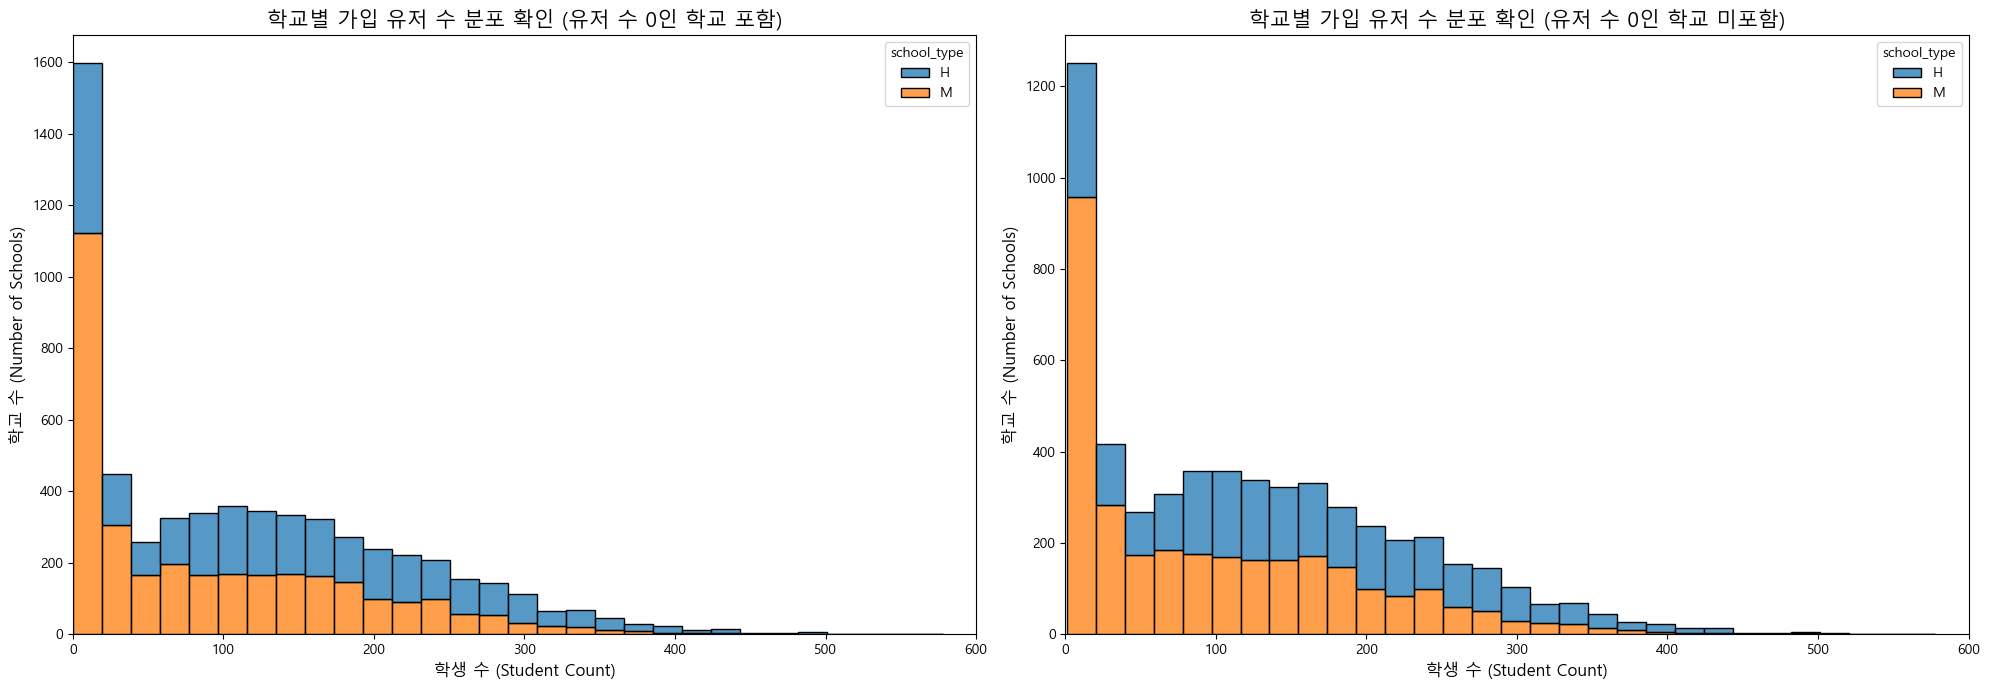

In [148]:
# 2개의 서브플롯을 가로로 나란히 배치
fig, axes = plt.subplots(1, 2, figsize=(20, 7)) # 1행 2열

# 첫 번째 서브플롯: 유저 수 = 0 포함 버전
sns.histplot(data=accounts_school_df,
             x='student_count',
             hue='school_type',
             multiple='stack', 
             bins=30,
             ax=axes[0], 
             edgecolor='black') 
axes[0].set_title('학교별 가입 유저 수 분포 확인 (유저 수 0인 학교 포함)', fontsize=15)
axes[0].set_xlabel('학생 수 (Student Count)', fontsize=12)
axes[0].set_ylabel('학교 수 (Number of Schools)', fontsize=12)
axes[0].set_xlim(0, 600) # x축 범위 고정 (비교 용이성)

# 두 번째 서브플롯: 유저 수 = 0 제거 버전
sns.histplot(data=student_count_upper_than_0_accounts_school_df,
             x='student_count',
             hue='school_type',
             multiple='stack', 
             bins=30,
             ax=axes[1],
             edgecolor='black') 
axes[1].set_title('학교별 가입 유저 수 분포 확인 (유저 수 0인 학교 미포함)', fontsize=15)
axes[1].set_xlabel('학생 수 (Student Count)', fontsize=12)
axes[1].set_ylabel('학교 수 (Number of Schools)', fontsize=12)
axes[1].set_xlim(0, 600) # x축 범위 고정 (비교 용이성)


# 전체 레이아웃 조정 및 표시
plt.tight_layout() # 서브플롯 간의 간격 자동 조정
plt.show()

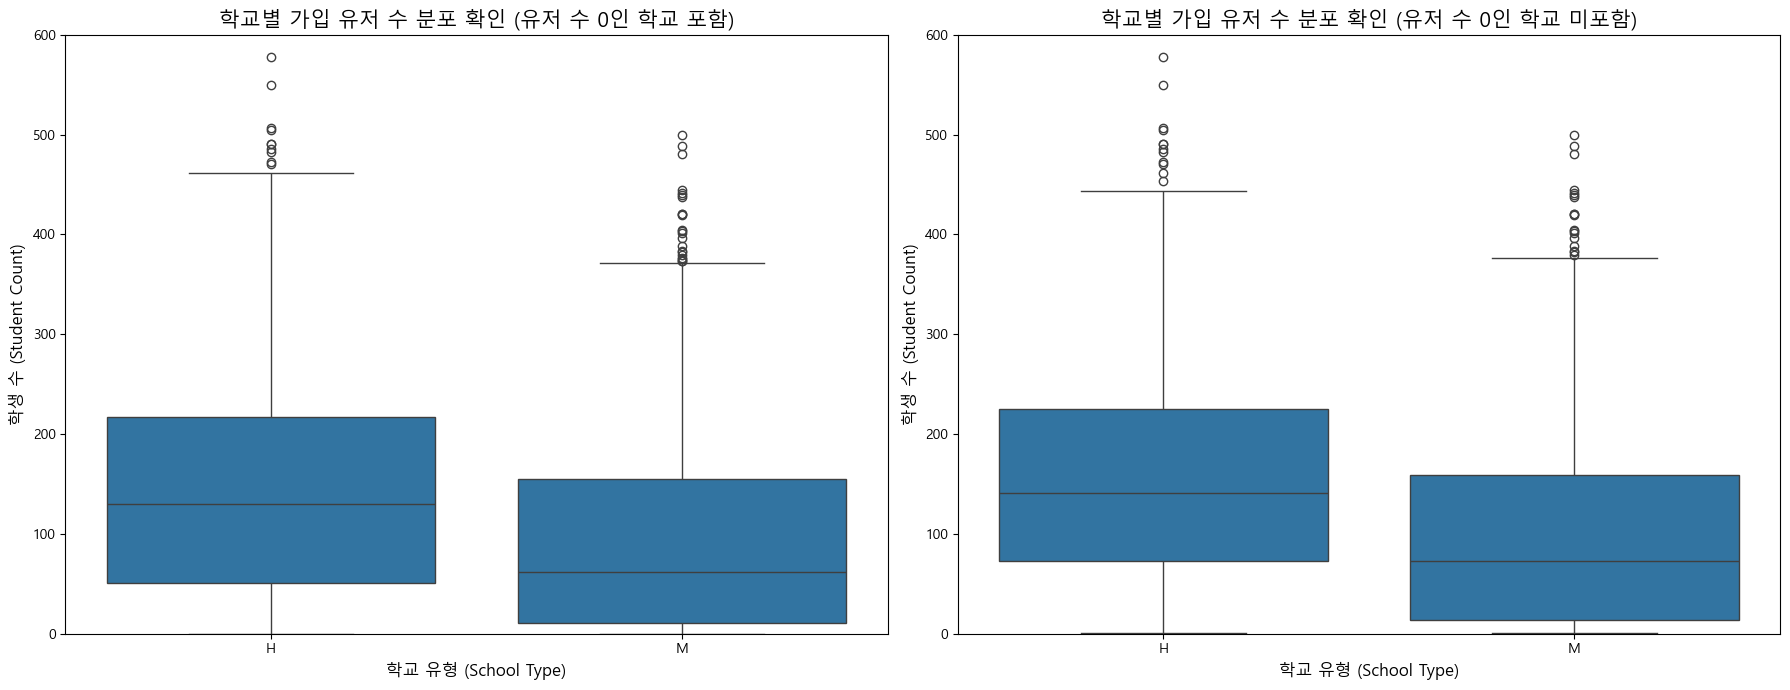

In [149]:
# 2개의 서브플롯을 가로로 나란히 배치
fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # 1행 2열, 크기 조정

# 첫 번째 서브플롯: 유저 수 = 0 포함 버전 박스플롯
sns.boxplot(x='school_type',
            y='student_count',
            data=accounts_school_df,
            ax=axes[0]) # 첫 번째 서브플롯에 그림
axes[0].set_title('학교별 가입 유저 수 분포 확인 (유저 수 0인 학교 포함)', fontsize=15)
axes[0].set_xlabel('학교 유형 (School Type)', fontsize=12)
axes[0].set_ylabel('학생 수 (Student Count)', fontsize=12)
axes[0].set_ylim(0, 600) # y축 범위 고정 (비교 용이성)


# 두 번째 서브플롯: 유저 수 = 0 제거 버전 박스플롯
sns.boxplot(x='school_type',
            y='student_count',
            data=student_count_upper_than_0_accounts_school_df,
            ax=axes[1]) # 두 번째 서브플롯에 그림
axes[1].set_title('학교별 가입 유저 수 분포 확인 (유저 수 0인 학교 미포함)', fontsize=15)
axes[1].set_xlabel('학교 유형 (School Type)', fontsize=12)
axes[1].set_ylabel('학생 수 (Student Count)', fontsize=12)
axes[1].set_ylim(0, 600) # y축 범위 고정 (비교 용이성)


# 전체 레이아웃 조정 및 표시
plt.tight_layout() # 서브플롯 간의 간격 자동 조정
plt.show()

## 학교 별 실제 이용 유저

In [174]:
# accounts_group_df 의 school_id
# user_properties_df 의 school_id
user_school_info = pd.merge(
    accounts_group_df,
    user_properties_df,
    on=['school_id','grade'],
    how='left'
)

In [175]:
user_school_info

,id,grade,class_num,school_id,user_id,class,gender
0,1,1,1,1,1236848,1.0,M
1,1,1,1,1,1437875,1.0,M
2,1,1,1,1,1572211,1.0,M
3,1,1,1,1,1577131,1.0,M
4,1,1,1,1,1577930,1.0,M
...,...,...,...,...,...,...,...
1999270,84546,3,11,2240,1038957,15.0,M
1999271,84546,3,11,2240,1263811,15.0,M
1999272,84546,3,11,2240,1341349,15.0,M
1999273,84546,3,11,2240,1442477,1.0,M


In [176]:
# class_num과 class의 값이 다른 데이터들도 존재 
# class_num과 class의 값이 다른 경우 해당 행 삭제
user_school_info_same = user_school_info[user_school_info['class_num'] == user_school_info['class']].copy()
user_school_info_same

,id,grade,class_num,school_id,user_id,class,gender
0,1,1,1,1,1236848,1.0,M
1,1,1,1,1,1437875,1.0,M
2,1,1,1,1,1572211,1.0,M
3,1,1,1,1,1577131,1.0,M
4,1,1,1,1,1577930,1.0,M
...,...,...,...,...,...,...,...
1994375,84081,2,2,912,1579918,2.0,M
1994380,84082,2,3,1845,1579921,3.0,F
1994382,84083,3,3,4727,1579924,3.0,M
1994383,84084,3,3,2160,1579926,3.0,F


In [177]:
# 결측치 확인
user_school_info_same.isnull().sum()

id           0
grade        0
class_num    0
school_id    0
user_id      0
class        0
gender       0
dtype: int64

In [178]:
# 중복 데이터 확인
user_school_info_same[user_school_info_same.duplicated()]

,id,grade,class_num,school_id,user_id,class,gender


In [179]:
# 학교 별 실제 유저 수
# 학교 별 실제 유저 -> school_id가 같은 row들의 개수 구하기
user_school_info_same.groupby('school_id')['user_id'].count().sort_values(ascending=False).describe()

count    5022.000000
mean       45.963162
std        35.923950
min         1.000000
25%        15.000000
50%        41.000000
75%        69.000000
max       206.000000
Name: user_id, dtype: float64

In [180]:
# 학교 별, 학년 별 실제 유저 수
school_grade_user_counts = user_school_info_same.groupby(['school_id', 'grade'])['user_id'].count()
school_grade_user_counts

school_id  grade
1          1        20
           2         2
           3         7
4          1        34
           2        22
                    ..
5961       3        11
5963       1         7
           2         1
           3         2
5964       2         1
Name: user_id, Length: 11128, dtype: int64

In [181]:
# 1학년 데이터의 describe
print("실제 사용 유저 중 1학년의 describe:")
grade_1_counts = school_grade_user_counts.loc[(slice(None), 1)] # school_id는 모두, grade는 1인 데이터 선택
print(grade_1_counts.describe())

실제 사용 유저 중 1학년의 describe:
count    2298.000000
mean       29.052654
std        18.378555
min         1.000000
25%        16.000000
50%        27.000000
75%        41.000000
max        94.000000
Name: user_id, dtype: float64


In [182]:
# 2학년 데이터의 describe
print("실제 사용 유저 중 2학년의 describe:")
grade_1_counts = school_grade_user_counts.loc[(slice(None), 2)] # school_id는 모두, grade는 2인 데이터 선택
print(grade_1_counts.describe())

실제 사용 유저 중 2학년의 describe:
count    4650.000000
mean       20.813978
std        19.160843
min         1.000000
25%         6.000000
50%        16.000000
75%        30.000000
max       132.000000
Name: user_id, dtype: float64


In [183]:
# 3학년 데이터의 describe
print("실제 사용 유저 중 3학년의 describe:")
grade_1_counts = school_grade_user_counts.loc[(slice(None), 3)] # school_id는 모두, grade는 3인 데이터 선택
print(grade_1_counts.describe())

실제 사용 유저 중 3학년의 describe:
count    4180.000000
mean       16.095455
std        17.302254
min         1.000000
25%         3.000000
50%         9.000000
75%        25.000000
max       116.000000
Name: user_id, dtype: float64


## 모든 유저별 일간/월간 활성 유저 (DAU, MAU)

In [184]:
# 가장 이른 날짜 (최소값)
earliest_date = hackle_events_df['event_datetime'].min()
print(f"가장 이른 날짜: {earliest_date}")

# 가장 늦은 날짜 (최대값)
latest_date = hackle_events_df['event_datetime'].max()
print(f"가장 늦은 날짜: {latest_date}")

가장 이른 날짜: 2023-07-18 00:00:00
가장 늦은 날짜: 2023-08-10 23:59:59


- 한 달의 유저 이벤트 데이터로 어플의 전체 경향성을 알기 어려움.
    - 전체 기간의 데이터를 가져와 로그 확인 -> 지금 데이터 가지고도 메모리 에러가 뜨는데, 300GB를 버틸 수 있을까?
    - 데이터 확인 결과, session_id 별로 세션 오픈 시각에 대한 기록만 존재함.
    - 서비스 내부 데이터를 활용하여 일간/월간 활성 유저 기록 확인

In [185]:
explode_accounts_attendance_df.columns

Index(['attendance_date_list', 'user_id'], dtype='object')

In [186]:
# 가장 이른 날짜 (최소값)
earliest_date = explode_accounts_attendance_df['attendance_date_list'].min()
print(f"가장 이른 날짜: {earliest_date}")

# 가장 늦은 날짜 (최대값)
latest_date = explode_accounts_attendance_df['attendance_date_list'].max()
print(f"가장 늦은 날짜: {latest_date}")

가장 이른 날짜: 2023-05-27 00:00:00
가장 늦은 날짜: 2024-05-09 00:00:00


In [187]:
explode_accounts_attendance_df.head()

,attendance_date_list,user_id
0,2023-05-27,1446852
1,2023-05-28,1446852
2,2023-05-29,1446852
3,2023-05-30,1446852
4,2023-06-03,1446852


In [188]:
explode_accounts_attendance_df['attendance_date_list'] = pd.to_datetime(explode_accounts_attendance_df['attendance_date_list'])

In [190]:
explode_accounts_attendance_df.columns

Index(['attendance_date_list', 'user_id'], dtype='object')

In [191]:
explode_accounts_attendance_df.rename(columns={'attendance_date_list': 'event_date'}, inplace=True)

In [192]:
explode_accounts_attendance_df.columns

Index(['event_date', 'user_id'], dtype='object')

In [193]:
# DAU 계산 및 시각화
dau_series = explode_accounts_attendance_df.groupby(explode_accounts_attendance_df['event_date'].dt.to_period('D'))['user_id'].nunique()

# 시각화를 위해 PeriodIndex를 DateTimeIndex로 변환
dau_series.index = dau_series.index.to_timestamp()
dau_series

event_date
2023-05-27     62417
2023-05-28     94220
2023-05-29    172836
2023-05-30    166052
2023-05-31    115713
               ...  
2024-05-05       107
2024-05-06       110
2024-05-07        60
2024-05-08        68
2024-05-09        46
Name: user_id, Length: 333, dtype: int64

DAU 시각화


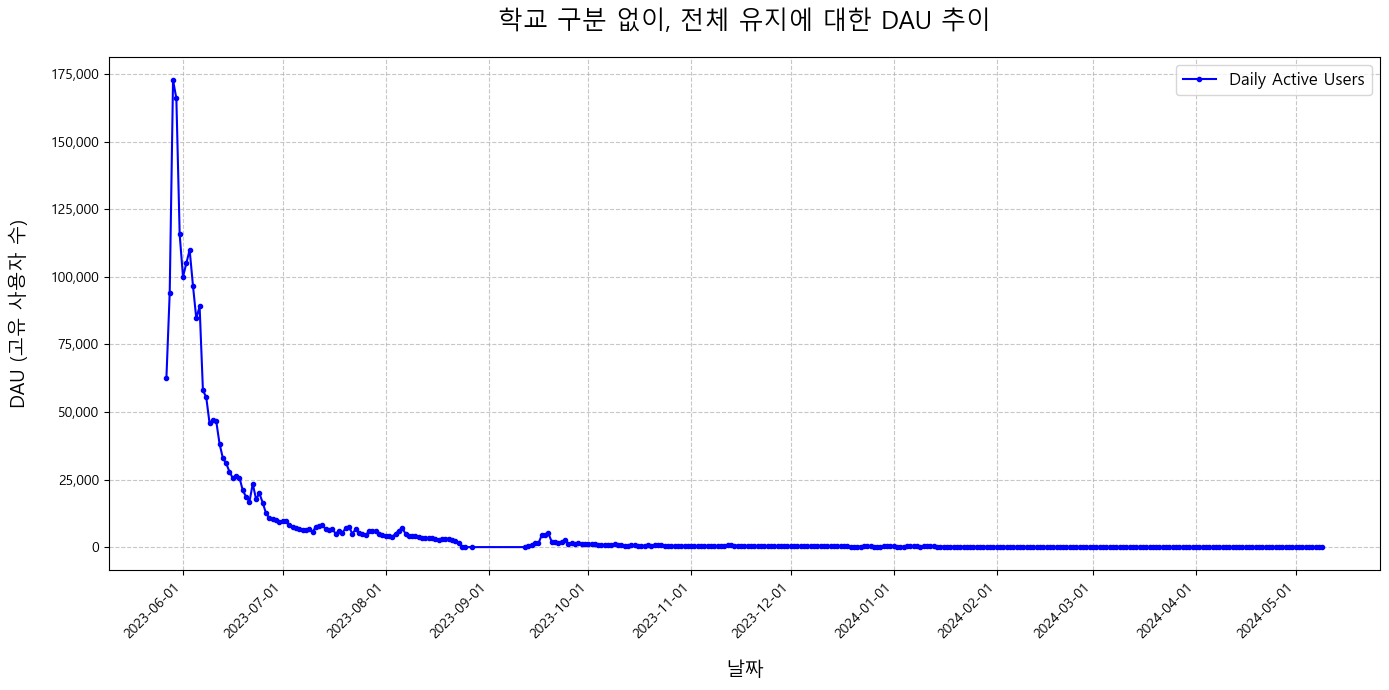

In [194]:
# DAU 시각화
print("DAU 시각화")
plt.figure(figsize=(14, 7))
plt.plot(dau_series.index, dau_series.values, marker='o', linestyle='-', markersize=3, color='blue', label='Daily Active Users')

plt.title('학교 구분 없이, 전체 유지에 대한 DAU 추이', fontsize=18, pad=20)
plt.xlabel('날짜', fontsize=14, labelpad=15)
plt.ylabel('DAU (고유 사용자 수)', fontsize=14, labelpad=15)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1)) # 한 달 간격으로 틱 표시
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [196]:
# MAU (월간 활성 사용자) 계산 및 시각화
mau_series = explode_accounts_attendance_df.groupby(explode_accounts_attendance_df['event_date'].dt.to_period('M'))['user_id'].nunique()

# 시각화를 위해 PeriodIndex를 DateTimeIndex로 변환 (필수)
mau_series.index = mau_series.index.to_timestamp()

print("월별 MAU:")
mau_series

월별 MAU:


event_date
2023-05-01    264049
2023-06-01    226928
2023-07-01     61836
2023-08-01     28314
2023-09-01     20482
2023-10-01      9011
2023-11-01      6050
2023-12-01      3612
2024-01-01      3072
2024-02-01      1191
2024-03-01       789
2024-04-01       919
2024-05-01       464
Freq: MS, Name: user_id, dtype: int64

MAU 시각화


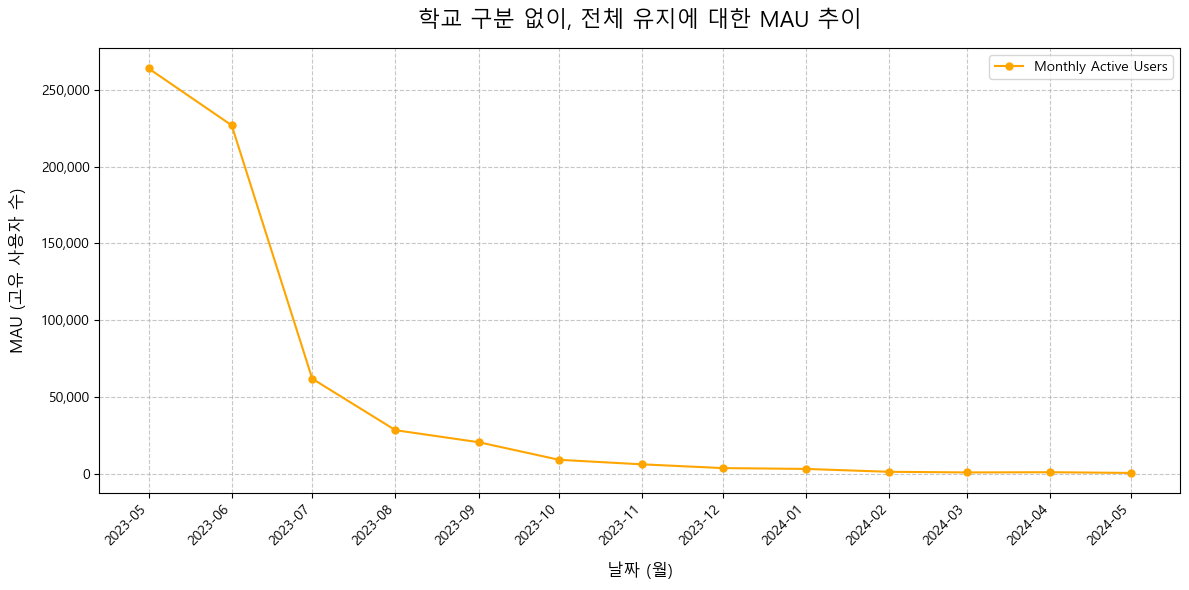

In [197]:
# MAU 시각화
print("MAU 시각화")
plt.figure(figsize=(12, 6))
plt.plot(mau_series.index, mau_series.values, marker='o', linestyle='-', markersize=5, color='orange', label='Monthly Active Users')

plt.title('학교 구분 없이, 전체 유지에 대한 MAU 추이', fontsize=16, pad=15)
plt.xlabel('날짜 (월)', fontsize=12, labelpad=10)
plt.ylabel('MAU (고유 사용자 수)', fontsize=12, labelpad=10)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [198]:
# DAU/MAU 비율 계산 및 시각화
# 월별 DAU의 평균을 계산
# resample('M')을 사용하여 월별로 데이터를 다시 샘플링하고, .mean()으로 평균
avg_dau_per_month = dau_series.resample('M').mean().to_period('M').to_timestamp(how='start')

# MAU 시리즈와 평균 DAU 시리즈를 결합
combined_data = pd.DataFrame({
    'avg_dau': avg_dau_per_month,
    'mau': mau_series
})

# DAU/MAU 비율 계산 (MAU가 0이 되는 경우를 대비)
combined_data['dau_mau_ratio'] = (combined_data['avg_dau'] / combined_data['mau']) * 100
combined_data['dau_mau_ratio'] = combined_data['dau_mau_ratio'].fillna(0) # MAU가 0이어서 비율 계산이 불가능한 경우 0으로 채움

print("월별 DAU/MAU 비율:")
print(combined_data[['avg_dau', 'mau', 'dau_mau_ratio']])

월별 DAU/MAU 비율:
                  avg_dau     mau  dau_mau_ratio
event_date                                      
2023-05-01  122247.600000  264049      46.297316
2023-06-01   41092.533333  226928      18.108181
2023-07-01    6461.483871   61836      10.449388
2023-08-01    3290.269231   28314      11.620644
2023-09-01    1900.684211   20482       9.279778
2023-10-01     707.935484    9011       7.856348
2023-11-01     438.466667    6050       7.247383
2023-12-01     278.290323    3612       7.704605
2024-01-01     187.258065    3072       6.095640
2024-02-01      87.206897    1191       7.322158
2024-03-01      59.838710     789       7.584120
2024-04-01      57.600000     919       6.267682
2024-05-01      78.111111     464      16.834291


C:\Users\USER\AppData\Local\Temp\ipykernel_19204\3710950306.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  avg_dau_per_month = dau_series.resample('M').mean().to_period('M').to_timestamp(how='start')


DAU와 MAU 함께 시각화


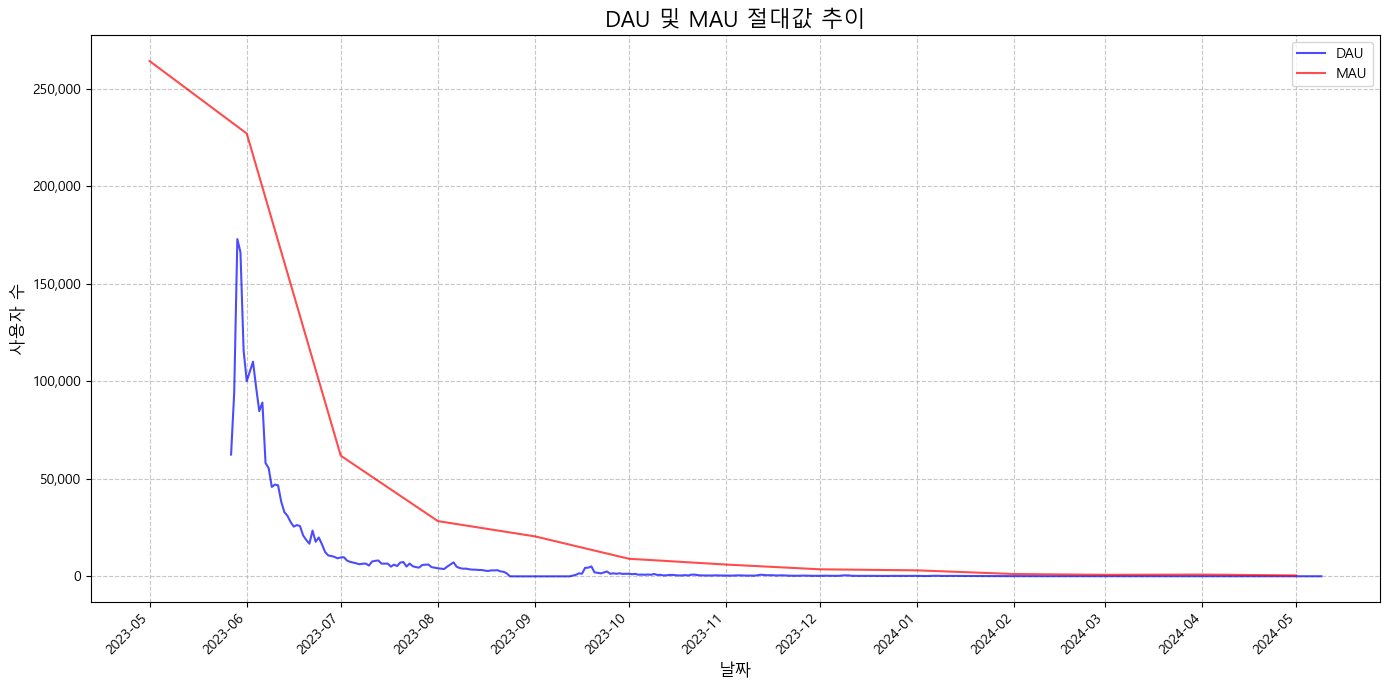

In [204]:
# DAU와 MAU도 함께 시각화
print("DAU와 MAU 함께 시각화")
plt.figure(figsize=(14, 7))
plt.plot(dau_series.index, dau_series.values, label='DAU', color='blue', alpha=0.7)
plt.plot(mau_series.index, mau_series.values, label='MAU', color='red', alpha=0.7)
plt.title('DAU 및 MAU 절대값 추이', fontsize=16)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

- 시간이 지날수록 감소하는 것으로 보임

## 월별 이탈 유저 수

In [200]:
leave_user = accounts_userwithdraw_df.copy()
leave_user.head()

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19


In [201]:
# 이탈 시점을 '월별'로 분할
leave_user['withdrawal_month'] = leave_user['created_at'].dt.to_period('M')

# 월별 이탈 기록 개수 (Withdrawal Count per Month)
monthly_withdrawal_count = leave_user.groupby('withdrawal_month').size()

# 결과를 출력합니다.
print("\n--- 월별 이탈 사용자 수 (이탈 기록의 개수) ---")
print(monthly_withdrawal_count)


--- 월별 이탈 사용자 수 (이탈 기록의 개수) ---
withdrawal_month
2023-03       17
2023-04     2397
2023-05    44845
2023-06     9642
2023-07     4811
2023-08     2310
2023-09     2450
2023-10     1164
2023-11      837
2023-12      693
2024-01      697
2024-02      319
2024-03      250
2024-04      240
2024-05       92
Freq: M, dtype: int64


In [202]:
# 시각화를 위해 PeriodIndex를 DateTimeIndex로 변환 (월의 시작일로)
monthly_withdrawal_count.index = monthly_withdrawal_count.index.to_timestamp(how='start')

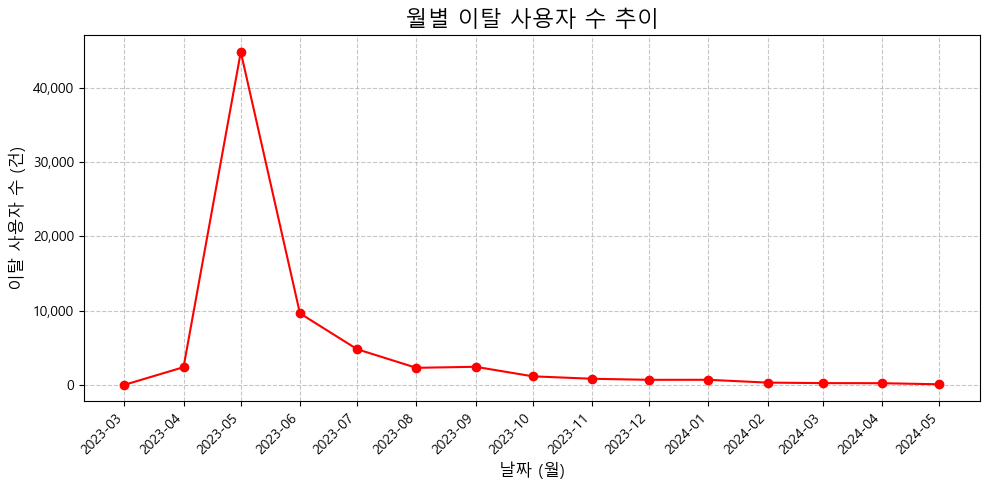

In [203]:
# 시각화: 월별 이탈 사용자 수 추이
plt.figure(figsize=(10, 5))
plt.plot(monthly_withdrawal_count.index, monthly_withdrawal_count.values, marker='o', linestyle='-', color='red')
plt.title('월별 이탈 사용자 수 추이', fontsize=16)
plt.xlabel('날짜 (월)', fontsize=12)
plt.ylabel('이탈 사용자 수 (건)', fontsize=12) # '건'으로 표현하면 기록의 개수
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # 천 단위 콤마
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [204]:
leave_user.head()

,id,reason,created_at,withdrawal_month
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12,2023-03
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59,2023-03
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32,2023-03
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03,2023-03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19,2023-03


In [205]:
leave_user['reason'].value_counts()

reason
기타 이유           40301
함께 할 친구가 없어서    14450
재밌는 질문이 없어서     13133
버그가 너무 많아서       2031
구독료가 너무 비싸서       730
admin              61
test               53
기타                  5
Name: count, dtype: int64

In [206]:
# 모든 이탈 이유별로 월별 이탈 사용자 수 집계
# 피벗 테이블을 사용하여 'withdrawal_month'를 인덱스로, 'reason'을 컬럼으로, 개수를 값으로 만듭니다.
# fill_value=0: 데이터가 없는 월에는 0으로 채움
monthly_reason_pivot_all = leave_user.pivot_table(
    index='withdrawal_month',
    columns='reason',
    aggfunc='size', # 각 그룹의 행 개수 (이탈 기록 개수)
    fill_value=0
)

In [207]:
# 시각화를 위해 PeriodIndex를 DateTimeIndex로 변환 (월의 시작일로)
monthly_reason_pivot_all.index = monthly_reason_pivot_all.index.to_timestamp(how='start')

In [210]:
print("\n--- 모든 이탈 이유별 월별 이탈 사용자 수 ---")
monthly_reason_pivot_all



--- 모든 이탈 이유별 월별 이탈 사용자 수 ---


reason,admin,test,구독료가 너무 비싸서,기타,기타 이유,버그가 너무 많아서,재밌는 질문이 없어서,함께 할 친구가 없어서
withdrawal_month,,,,,,,,
2023-03-01,0,1,0,0,3,2,7,4
2023-04-01,0,17,39,0,1368,70,301,602
2023-05-01,7,34,484,4,25171,1454,7496,10195
2023-06-01,8,1,93,1,5424,209,2448,1458
2023-07-01,5,0,43,0,2847,84,1103,729
2023-08-01,3,0,17,0,1420,42,490,338
2023-09-01,7,0,14,0,1482,50,514,383
2023-10-01,11,0,12,0,697,23,225,196
2023-11-01,9,0,10,0,497,35,147,139


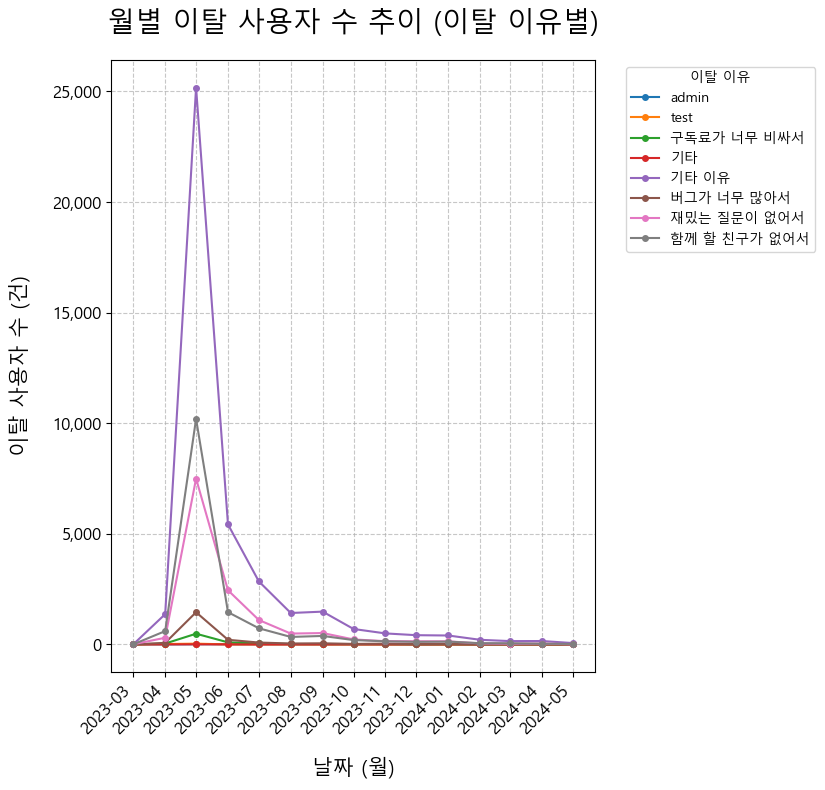

In [211]:
# 그래프 그리기
plt.figure(figsize=(10, 8)) # 그래프 크기를 더 크게 설정하여 복잡성 완화

# 각 이유별로 선 그래프 그리기
for column in monthly_reason_pivot_all.columns:
    plt.plot(monthly_reason_pivot_all.index, monthly_reason_pivot_all[column], marker='o', linestyle='-', label=column, markersize=4)

plt.title('월별 이탈 사용자 수 추이 (이탈 이유별)', fontsize=20, pad=20)
plt.xlabel('날짜 (월)', fontsize=15, labelpad=15)
plt.ylabel('이탈 사용자 수 (건)', fontsize=15, labelpad=15)

# x축 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.xticks(rotation=45, ha='right', fontsize=12)

# y축 포맷 설정: 숫자에 천 단위 콤마 추가
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
# 범례를 그래프 밖에 표시하고, 컬럼이 많으므로 열을 늘려서 표시
plt.legend(title='이탈 이유', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=10)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # 범례 공간 확보
plt.show()

## 코호트 분석

- 코호트의 정의 : 유저들이 가입한 날을 기준으로 사용자 그룹 정의
- 활동 추적 : 각 코호트의 사용자들이 가입일로부터 N일 째 되는 날에 앱을 다시 사용했는지 확인
    - 출석테이블에 기록된 날짜들 중 첫 번째 출석일 = 가입일로 가정 (더 자세한 분석을 위해서는 모든 hackle 데이터를 가져와 분석해야할 것 같음)
    - 이후 리텐션 구하기

In [212]:
accounts_attendance_df.head()

,id,attendance_date_list,user_id
0,1,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1446852
1,2,"[2023-05-27, 2023-05-29, 2023-05-30, 2023-06-0...",1359398
2,3,"[2023-05-27, 2023-05-29, 2023-05-30, 2023-05-3...",1501542
3,4,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1507767
4,5,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1287453


In [213]:
explode_accounts_attendance_df = explode_accounts_attendance_df.rename(columns={'attendance_date_list': 'event_date'})
explode_accounts_attendance_df.head()

,event_date,user_id
0,2023-05-27,1446852
1,2023-05-28,1446852
2,2023-05-29,1446852
3,2023-05-30,1446852
4,2023-06-03,1446852


In [214]:
# 각 유저의 첫 활동일 (가입일 또는 최초 접속일) 정의
# user_id와 event_date 기준으로 그룹화하여 각 user_id의 가장 빠른 event_date를 찾습니다.
first_activity_df = explode_accounts_attendance_df.groupby('user_id')['event_date'].min().reset_index()
first_activity_df.columns = ['user_id', 'first_active_date']
first_activity_df.head()

,user_id,first_active_date
0,832151,2023-05-29
1,832340,2023-06-05
2,832986,2023-05-28
3,833041,2023-05-27
4,833112,2023-09-18


In [215]:
# 첫 활동일을 기준으로 코호트 정의 (월 단위)
first_activity_df['cohort_month'] = first_activity_df['first_active_date'].dt.to_period('M')
first_activity_df.head()

,user_id,first_active_date,cohort_month
0,832151,2023-05-29,2023-05
1,832340,2023-06-05,2023-06
2,832986,2023-05-28,2023-05
3,833041,2023-05-27,2023-05
4,833112,2023-09-18,2023-09


In [216]:
# 모든 활동 기록에 코호트 월과 첫 활동일 정보 병합
# merge를 통해 explode_accounts_attendance_df에 각 활동이 어떤 코호트에 속하는지 정보 추가
df_merged = explode_accounts_attendance_df.merge(first_activity_df, on='user_id', how='left')
df_merged.head()

,event_date,user_id,first_active_date,cohort_month
0,2023-05-27,1446852,2023-05-27,2023-05
1,2023-05-28,1446852,2023-05-27,2023-05
2,2023-05-29,1446852,2023-05-27,2023-05
3,2023-05-30,1446852,2023-05-27,2023-05
4,2023-06-03,1446852,2023-05-27,2023-05


In [217]:
# 각 활동일이 첫 활동일로부터 며칠째인지 계산 (Retention Period)
# event_date와 first_active_date의 차이를 일수로 계산
df_merged['retention_day'] = (df_merged['event_date'] - df_merged['first_active_date']).dt.days
df_merged.head()

,event_date,user_id,first_active_date,cohort_month,retention_day
0,2023-05-27,1446852,2023-05-27,2023-05,0.0
1,2023-05-28,1446852,2023-05-27,2023-05,1.0
2,2023-05-29,1446852,2023-05-27,2023-05,2.0
3,2023-05-30,1446852,2023-05-27,2023-05,3.0
4,2023-06-03,1446852,2023-05-27,2023-05,7.0


In [218]:
# 리텐션 코호트 테이블 생성
# cohort_month를 인덱스로, retention_day를 컬럼으로, 고유 사용자 수를 값으로 하는 피벗 테이블 생성
cohort_counts = df_merged.groupby(['cohort_month', 'retention_day'])['user_id'].nunique().reset_index()
print("--- 코호트별, 리텐션 Day별 고유 사용자 수 ---")
cohort_counts.head()

--- 코호트별, 리텐션 Day별 고유 사용자 수 ---


,cohort_month,retention_day,user_id
0,2023-05,0.0,264049
1,2023-05,1.0,133513
2,2023-05,2.0,130811
3,2023-05,3.0,110351
4,2023-05,4.0,97508


In [219]:
cohort_pivot = cohort_counts.pivot_table(
    index='cohort_month',
    columns='retention_day',
    values='user_id'
)
print("--- 코호트 피벗 테이블 (사용자 수) ---")
cohort_pivot

--- 코호트 피벗 테이블 (사용자 수) ---


retention_day,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0
cohort_month,,,,,,,,,,,,,,,,,,,,,
2023-05,264049.0,133513.0,130811.0,110351.0,97508.0,92504.0,89015.0,83664.0,75655.0,64436.0,...,57.0,61.0,64.0,58.0,69.0,67.0,68.0,43.0,35.0,17.0
2023-06,47133.0,12813.0,10348.0,8697.0,7482.0,6504.0,5499.0,5096.0,4690.0,4362.0,...,5.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-07,10043.0,1682.0,1289.0,1102.0,970.0,863.0,846.0,773.0,749.0,705.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,2545.0,288.0,187.0,149.0,130.0,98.0,91.0,71.0,73.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,2367.0,166.0,141.0,109.0,80.0,84.0,82.0,56.0,57.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,789.0,48.0,42.0,35.0,24.0,33.0,34.0,20.0,22.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11,673.0,58.0,38.0,18.0,20.0,10.0,10.0,14.0,3.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12,298.0,18.0,15.0,13.0,12.0,13.0,10.0,13.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01,356.0,27.0,14.0,11.0,6.0,9.0,4.0,10.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
# 리텐션 비율 계산
# 각 코호트의 Day 0 사용자 수 (즉, 첫 달에 유입된 총 사용자 수)로 나눔
cohort_sizes = cohort_pivot.iloc[:, 0] # Day 0 컬럼이 해당 코호트의 총 사용자 수
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0) * 100 # 비율을 100% 기준으로
print("--- 리텐션 매트릭스 (비율 %) ---")
retention_matrix

--- 리텐션 매트릭스 (비율 %) ---


retention_day,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0
cohort_month,,,,,,,,,,,,,,,,,,,,,
2023-05,100.0,50.563721,49.540426,41.791864,36.927994,35.032892,33.711546,31.685028,28.651879,24.403046,...,0.021587,0.023102,0.024238,0.021966,0.026132,0.025374,0.025753,0.016285,0.013255,0.006438
2023-06,100.0,27.184775,21.954894,18.452040,15.874228,13.799249,11.666985,10.811958,9.950565,9.254662,...,0.010608,0.006365,0.004243,0.002122,NaN,NaN,NaN,NaN,NaN,NaN
2023-07,100.0,16.747984,12.834810,10.972817,9.658469,8.593050,8.423778,7.696903,7.457931,7.019815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,100.0,11.316306,7.347741,5.854617,5.108055,3.850688,3.575639,2.789784,2.868369,2.789784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,100.0,7.013097,5.956907,4.604985,3.379806,3.548796,3.464301,2.365864,2.408112,2.281369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,100.0,6.083650,5.323194,4.435995,3.041825,4.182510,4.309252,2.534854,2.788340,2.788340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11,100.0,8.618128,5.646360,2.674591,2.971768,1.485884,1.485884,2.080238,0.445765,1.337296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12,100.0,6.040268,5.033557,4.362416,4.026846,4.362416,3.355705,4.362416,2.684564,2.013423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01,100.0,7.584270,3.932584,3.089888,1.685393,2.528090,1.123596,2.808989,1.404494,0.842697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


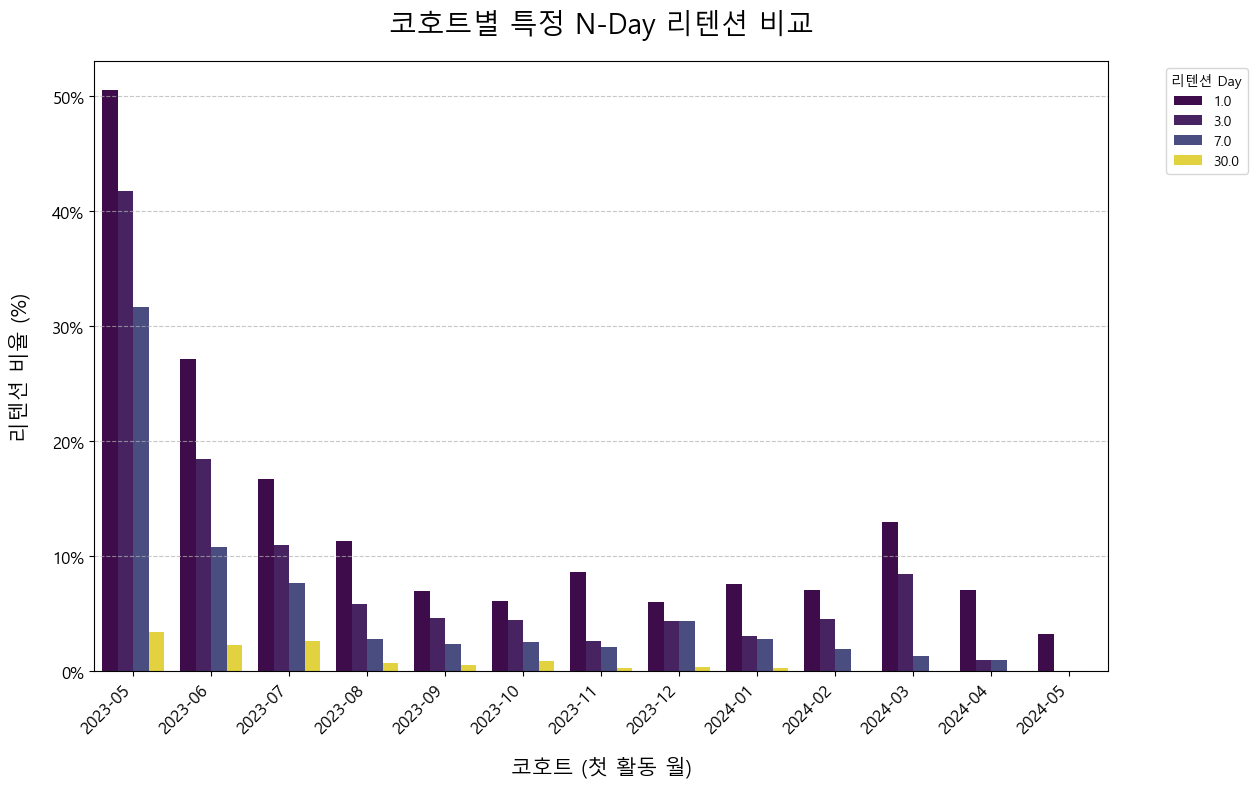

In [222]:
# 특정 N-Day 리텐션을 코호트별로 비교하는 막대 그래프
# 분석하고 싶은 N-Day를 리스트로 지정합니다.
n_days_to_plot = [1, 3, 7, 30] # Day 1, Day 3, Day 7, Day 30 리텐션

plt.figure(figsize=(15, 8))

# 각 N-Day에 대해 막대 그래프를 그립니다.
# matplotlib의 bar 함수는 여러 막대를 그룹으로 묶기 복잡하므로, melt를 사용하여 데이터를 재구성합니다.
plot_data = retention_matrix.reset_index().melt(
    id_vars='cohort_month',
    value_vars=[col for col in n_days_to_plot if col in retention_matrix.columns], # 존재하는 Day만 선택
    var_name='Retention Day',
    value_name='Retention Rate'
)

# cohort_month를 문자열로 변환하여 x축 레이블이 잘 보이게 합니다.
plot_data['cohort_month_str'] = plot_data['cohort_month'].astype(str)
sns.barplot(
    data=plot_data,
    x='cohort_month_str',
    y='Retention Rate',
    hue='Retention Day', # N-Day별로 색상 구분
    palette='viridis'
)

plt.title('코호트별 특정 N-Day 리텐션 비교', fontsize=20, pad=20)
plt.xlabel('코호트 (첫 활동 월)', fontsize=15, labelpad=15)
plt.ylabel('리텐션 비율 (%)', fontsize=15, labelpad=15)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100.0, decimals=0)) # Y축 퍼센트 포맷

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='리텐션 Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_19204\819141515.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(available_cohorts))


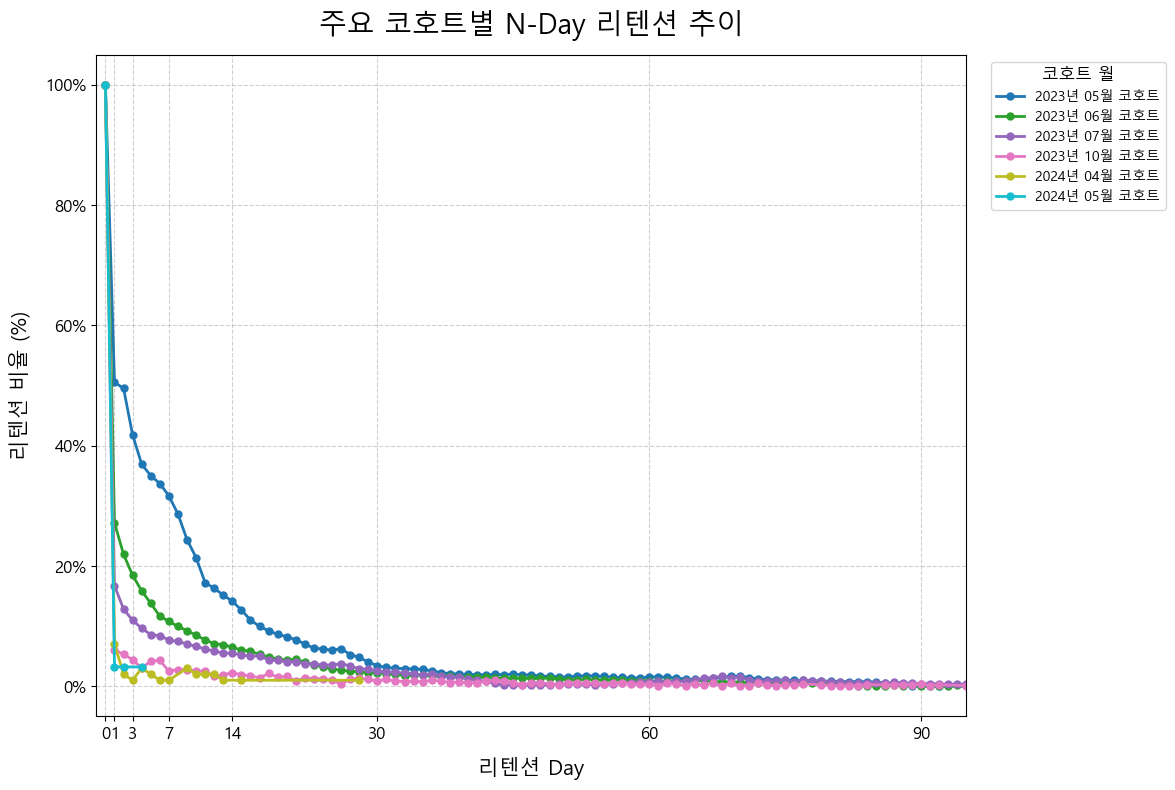

In [223]:
# 분석하고 싶은 코호트 (월)을 리스트로 지정
selected_cohort_periods = [
    pd.Period('2023-05', freq='M'), # 대규모 유입 시작 시기 & 리텐션이 가장 높은 시기
    pd.Period('2023-06', freq='M'), # 대규모 유입 지속 시기
    pd.Period('2023-07', freq='M'), # MAU 급감 시작 시기
    pd.Period('2023-10', freq='M'), # DAU/MAU 최저점 시점
    pd.Period('2024-04', freq='M'), # DAU/MAU 비율 상승 직전
    pd.Period('2024-05', freq='M')  # DAU/MAU 비율 상승 시점
]

# 실제로 retention_matrix에 존재하는 코호트만 필터링
available_cohorts = [c for c in selected_cohort_periods if c in retention_matrix.index]

if not available_cohorts:
    print("선택된 코호트 중 retention_matrix에 존재하는 코호트가 없습니다. 다른 코호트를 선택해주세요.")
else:
    plt.figure(figsize=(14, 8)) # 그래프 전체 크기 조정 (가로 14인치, 세로 8인치)

    # 색상 팔레트 설정 (더 많은 코호트를 구분하기 위해)
    colors = plt.cm.get_cmap('tab10', len(available_cohorts))

    for i, cohort_month in enumerate(available_cohorts):
        # 해당 코호트의 리텐션 데이터 가져오기 (NaN 값 제외)
        cohort_data = retention_matrix.loc[cohort_month].dropna()

        plt.plot(
            cohort_data.index,
            cohort_data.values,
            marker='o',
            linestyle='-',
            label=f'{cohort_month.strftime("%Y년 %m월")} 코호트',
            markersize=5,
            linewidth=2,
            color=colors(i) # 색상 적용
        )

    plt.title('주요 코호트별 N-Day 리텐션 추이', fontsize=20, pad=15)
    plt.xlabel('리텐션 Day', fontsize=15, labelpad=10)
    plt.ylabel('리텐션 비율 (%)', fontsize=15, labelpad=10)

    # X축 범위 설정 (초기 리텐션에 집중하기 위해 Day 0부터 Day 90까지)
    max_day_to_show = 90
    if retention_matrix.columns.max() < max_day_to_show:
        max_day_to_show = retention_matrix.columns.max()
    
    plt.xlim(-1, max_day_to_show + 5)

    # X축 눈금 설정 (주요 Day에만 표시)
    x_ticks_to_show = [0, 1, 3, 7, 14, 30, 60, 90]
    plt.xticks([d for d in x_ticks_to_show if d <= max_day_to_show], fontsize=12)

    # Y축 퍼센트 포맷
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100.0, decimals=0))
    plt.yticks(fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='코호트 월', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title_fontsize=12)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

## 질문 정보에 관한 EDA

In [224]:
polls_questionpiece_df.head()

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0


In [225]:
polls_questionpiece_df[['is_voted', 'is_skipped']].value_counts()
# is_voteed = 1, is_skipped = 0 -> 정상적인 투표 참여
# is_voteed = 0, is_skipped = 0 -> 질문을 보았지만, 투표하지 않은 경우 (세션종료, 앱 이탈 ..)
# is_voteed = 1, is_skipped = 1 -> 투표도 하고, 스킵도 함. => 오류로 판단해야할지, 특이한 행동 패턴인지?
#                               -> 스킵한 경우를 그냥 is_voted = 1, is_skipped = 1로 기록하는 것으로 추측

is_voted  is_skipped
1         0             1217560
0         0               46789
1         1                1127
Name: count, dtype: int64

In [226]:
error_polls_questionpiece = polls_questionpiece_df[
    (polls_questionpiece_df['is_voted'] == 1) &
    (polls_questionpiece_df['is_skipped'] == 1)
]

In [227]:
# 스킵한 경우를 그냥 is_voted = 1, is_skipped = 1로 기록하는 것으로 추측
error_polls_questionpiece

,id,is_voted,created_at,question_id,is_skipped
23144,1574198,1,2023-04-30 09:39:13,114,1
23145,1574199,1,2023-04-30 09:39:13,229,1
23146,1574200,1,2023-04-30 09:39:13,119,1
24675,1608036,1,2023-04-30 10:55:44,213,1
48246,2559618,1,2023-05-02 05:17:11,286,1
...,...,...,...,...,...
1264949,208294339,1,2024-01-20 12:40:03,3586,1
1265234,208341931,1,2024-03-03 10:28:42,2785,1
1265235,208341932,1,2024-03-03 10:28:42,1420,1
1265237,208341934,1,2024-03-03 10:28:42,2568,1


## 학교 근처 관련 데이터 분석

In [228]:
accounts_nearbyschool_df[accounts_nearbyschool_df['distance'] == 0].shape

(6214, 4)

In [229]:
df = accounts_nearbyschool_df[accounts_nearbyschool_df['distance'] == 0]
df[(df['school_id'] != df['nearby_school_id'])]

,id,distance,nearby_school_id,school_id
220,119241,0.0,28,27
230,119251,0.0,27,28
3170,122191,0.0,324,323
3200,122221,0.0,323,324
3220,122241,0.0,329,328
...,...,...,...,...
55460,174481,0.0,5553,5552
55950,174971,0.0,5619,5598
56120,175141,0.0,5598,5619
57040,176061,0.0,5720,5713


In [230]:
accounts_school_df[accounts_school_df['id'] == 28]

,id,address,student_count,school_type
24,28,충청북도 충주시,222,H


In [231]:
accounts_school_df[accounts_school_df['id'] == 27]

,id,address,student_count,school_type
23,27,충청북도 충주시,265,H


지방의 경우, 시까지의 정보만 나와있기 때문에 같은 시에 있는 학교의 거리는 0으로 표현됨.

In [232]:
merge_school_id = pd.merge(
    df,
    accounts_school_df,
    left_on = 'school_id',
    right_on = 'id',
    how='left'
)

In [233]:
merge_school_id.drop(['id_x', 'id_y'], axis=1, inplace=True)

In [234]:
merge_school_id = merge_school_id.rename(columns={
    'address': 'school_address',
    'student_count': 'school_student_count',
    'school_type': 'school_school_type'
})

In [235]:
merge_school_id.head()

,distance,nearby_school_id,school_id,school_address,school_student_count,school_school_type
0,0.0,7,7,충청북도 충주시,114,H
1,0.0,8,8,충청북도 충주시,139,M
2,0.0,22,22,충청북도 충주시,5,M
3,0.0,13,13,충청북도 충주시,80,H
4,0.0,20,20,충청북도 충주시,68,H


In [236]:
merge_school_info = pd.merge(
    merge_school_id,
    accounts_school_df,
    left_on='nearby_school_id',
    right_on='id',
    how='left'
)

In [237]:
merge_school_info.head()

,distance,nearby_school_id,school_id,school_address,school_student_count,school_school_type,id,address,student_count,school_type
0,0.0,7,7,충청북도 충주시,114,H,7,충청북도 충주시,114,H
1,0.0,8,8,충청북도 충주시,139,M,8,충청북도 충주시,139,M
2,0.0,22,22,충청북도 충주시,5,M,22,충청북도 충주시,5,M
3,0.0,13,13,충청북도 충주시,80,H,13,충청북도 충주시,80,H
4,0.0,20,20,충청북도 충주시,68,H,20,충청북도 충주시,68,H


In [238]:
merge_school_info.drop('id', axis=1, inplace=True)

In [239]:
merge_school_info = merge_school_info.rename(columns={
    'address': 'nearby_school_address',
    'student_count': 'nearby_school_student_count',
    'school_type': 'nearby_school_school_type'
})

In [240]:
merge_school_info.head()

,distance,nearby_school_id,school_id,school_address,school_student_count,school_school_type,nearby_school_address,nearby_school_student_count,nearby_school_school_type
0,0.0,7,7,충청북도 충주시,114,H,충청북도 충주시,114,H
1,0.0,8,8,충청북도 충주시,139,M,충청북도 충주시,139,M
2,0.0,22,22,충청북도 충주시,5,M,충청북도 충주시,5,M
3,0.0,13,13,충청북도 충주시,80,H,충청북도 충주시,80,H
4,0.0,20,20,충청북도 충주시,68,H,충청북도 충주시,68,H


In [241]:
# 학교 간의 거리가 0인 정보들에 대해
# school_id의 학교 정보 left join
# nearby_school_id의 학교 정보 left join
merge_school_info = merge_school_info[merge_school_info['nearby_school_id'] != merge_school_info['school_id']]
merge_school_info.head()

,distance,nearby_school_id,school_id,school_address,school_student_count,school_school_type,nearby_school_address,nearby_school_student_count,nearby_school_school_type
22,0.0,28,27,충청북도 충주시,265,H,충청북도 충주시,222,H
24,0.0,27,28,충청북도 충주시,222,H,충청북도 충주시,265,H
319,0.0,324,323,충청남도 천안시 동남구,249,H,충청남도 천안시 동남구,157,H
323,0.0,323,324,충청남도 천안시 동남구,157,H,충청남도 천안시 동남구,249,H
326,0.0,329,328,충청남도 예산군,164,H,충청남도 예산군,61,H


In [242]:
# 학교 주소 정보에 대해 차이가 있는 데이터 확인
# 실제 주소를 보니 큰 차이가 있는 것은 아닌 것으로 보임
diff_school_address = merge_school_info[merge_school_info['school_address'] != merge_school_info['nearby_school_address']]
diff_school_address

,distance,nearby_school_id,school_id,school_address,school_student_count,school_school_type,nearby_school_address,nearby_school_student_count,nearby_school_school_type
5521,0.0,5302,5294,경기도 부천시,273,H,경기도 부천시 소사구,246,H
5534,0.0,5294,5302,경기도 부천시 소사구,246,H,경기도 부천시,273,H


- 거리가 0이지만, 주소가 다른 경우를 확인해보니 주소의 세부 정보 차이로 확인
- 이상치는 아닌 것으로 확인됨

## 유저 출석 정보

In [243]:
# accounts_attendance_df 의 copy() 생성
merge_to_attendance = accounts_attendance_df.copy()
merge_to_attendance.head()

,id,attendance_date_list,user_id
0,1,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1446852
1,2,"[2023-05-27, 2023-05-29, 2023-05-30, 2023-06-0...",1359398
2,3,"[2023-05-27, 2023-05-29, 2023-05-30, 2023-05-3...",1501542
3,4,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1507767
4,5,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1287453


In [245]:
# 리스트의 길이를 반환하는 함수 (NaN 값 처리 포함)
def get_list_length_fixed(item):
    # 1. 먼저 item이 리스트인지 확인합니다.
    if isinstance(item, list):
        return len(item)
    # 2. 리스트가 아니라면, NaN 값인지 확인합니다.
    elif pd.isna(item):
        return 0
    # 3. 리스트도 아니고 NaN도 아닌 다른 예상치 못한 타입인 경우
    else:
        return 0

# attendance_date_list의 각 값(리스트)의 개수를 세어 'attendance_count' 컬럼 추가
merge_to_attendance['attendance_count'] = merge_to_attendance['attendance_date_list'].apply(get_list_length_fixed)

# 최종 결과 확인: 새로 생성된 'attendance_count' 컬럼이 추가된 DataFrame의 head() 출력
print("--- 'attendance_count' 컬럼이 추가된 merge_to_attendance.head() ---")
merge_to_attendance.head()

--- 'attendance_count' 컬럼이 추가된 merge_to_attendance.head() ---


,id,attendance_date_list,user_id,attendance_count
0,1,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1446852,13
1,2,"[2023-05-27, 2023-05-29, 2023-05-30, 2023-06-0...",1359398,33
2,3,"[2023-05-27, 2023-05-29, 2023-05-30, 2023-05-3...",1501542,9
3,4,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1507767,30
4,5,"[2023-05-27, 2023-05-28, 2023-05-29, 2023-05-3...",1287453,31


In [247]:
merge_to_attendance.drop(['id', 'attendance_date_list'], axis=1, inplace=True)
merge_to_attendance.head()

,user_id,attendance_count
0,1446852,13
1,1359398,33
2,1501542,9
3,1507767,30
4,1287453,31


In [251]:
merge_to_attendance['attendance_count'].describe()

count    349637.000000
mean          6.356098
std           9.158459
min           0.000000
25%           1.000000
50%           3.000000
75%           8.000000
max         310.000000
Name: attendance_count, dtype: float64

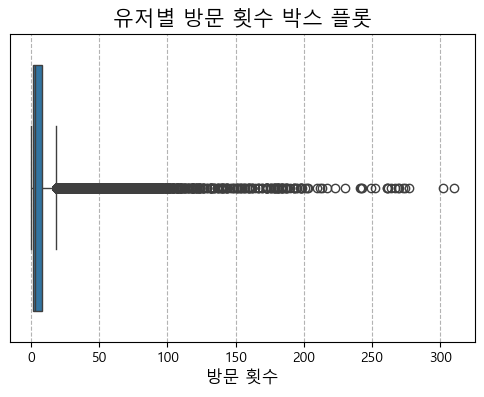

In [264]:
# 박스플롯 그리기 (KDE 커브 포함)
plt.figure(figsize=(6, 4)) # 그래프 크기 설정
sns.boxplot(x=merge_to_attendance['attendance_count'])
plt.title('유저별 방문 횟수 박스 플롯', fontsize=15)
plt.xlabel('방문 횟수', fontsize=12)
plt.yticks([]) # y축 라벨 제거 (수평 박스 플롯이라 필요 없음)
plt.grid(True, axis='x', ls="--", c='0.7') # x축 그리드 추가
plt.xticks(fontsize=10)
plt.show()

## 유저 정보

In [279]:
merge_to_user = accounts_user_df.copy()

In [280]:
merge_to_user.shape

(677085, 16)

In [281]:
# 실제 유저 확인해보기
merge_to_user[['is_superuser', 'is_staff']].value_counts()

# 전체 유저 중 3명 -> 관리자 계정 -> 삭제

is_superuser  is_staff
0             0           677081
              1                2
1             0                1
              1                1
Name: count, dtype: int64

In [282]:
staff_user = merge_to_user[merge_to_user['is_staff'] == 1]
staff_user

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,\N,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,\N
673997,1580627,0,1,M,300,[],1,2023-09-23 06:12:28.455787,[],[],N,0,0,0,0,122
674052,1580689,0,1,\N,0,[],0,2023-09-24 17:39:12.897884,[],[],N,0,0,0,0,\N


- 관리자 계정 831956, 1580627, 1580689

# 정리

- 유저 이벤트 데이터의 기간 : 2023년 7월 18일 ~ 2023년 8월 10일
- 서비스 내부 데이터의 기간 : 2023년 5월 27일 ~ 2024년 5월 9일

- 한 달의 유저 이벤트 데이터로 유저의 행동 패턴은 파악 가능하지만, 앱의 전체적인 경향은 알 수 없다.
- 다른 기간의 유저 이벤트 데이터를 확인한 결과, session_id 별로 세션 오픈 시각에 대한 기록만 존재한다.
- 현재, 유저 이벤트 데이터를 가지고 앱 전체적인 경향은 알 수 없다.
- 따라서 서비스 내부 데이터를 활용하여 일간/월간 활성 유저, 이탈 유저 수, 이탈 원인, 리텐션 등으로 전체적인 경향을 확인하였다.

- MAU, DAU 
    - 2023년 5월에 급상승하고, 2023년 6월, 급하락한다.
    - 유저 이벤트 데이터 기간인 2023년 7월~8월 사이의 기간 동안은, 급격한 하락은 아니지만 그래프의 팔꿈치 구간으로 볼 수 있다.
        - 활성 유저 수가 감소하는 상황에서의 유저 행동 패턴을 분석하게 된다.
- 월별 이탈 유저 수
    - 2023년 5월에 이탈이 급격 많아지고, 2023년 10월까지 이탈이 감소하는 추세이지만 여전히 높다.
        - 2023년 5월에 앱이 갑자기 유행했다가, 유행이 지난 후 자연스럽게 이탈하는 유저가 많아진 것은 아닐까? 추측된다.
        - 이탈 이유로 꼽은 사유 중 기타이유 라는 항목이 가장 많기 때문에, 행동 패턴으로 이탈 원인을 파악해야한다.
- 클래식 리텐션
    - 2023년 5월달 리텐션이 가장 높고, 시간이 지날수록 크게 감소하는 추세를 보인다.
    - 2024년 3월에 잠간 리텐션이 증가한다.
        - 클래식 리텐션을 보았을 때, 2034년 7월~8월 동안의 DAY 1의 클래식 리텐션도 20% 미만의 수치를 가지고 있다.
        - 활성 유저 수가 감소함과 동시에 남은 유저들의 재방문율 또한 낮아지는 추세이다.
- 학교 주소
    - 현재 표시된 학교의 주소가 시, 또는 구 까지만 표현되어 있어 해당 범위 내의 학교 간의 거리를 구하면 학교 간 거리가 0으로 표시된다.
- 유저 별 방문 횟수
    - 대부분 0~8회 사이로 앱에 방문하고, 그 이상 방문하는 유저들은 존재하지만 많은 비율을 차지하지 않는다.